In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report as cr
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
import sklearn.model_selection as sms
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

lr = LogisticRegression(solver='newton-cg', multi_class='ovr', n_jobs=1) 
lda = LinearDiscriminantAnalysis(solver='svd')
qda = QuadraticDiscriminantAnalysis()

%matplotlib inline

In [10]:
df = pd.read_csv('gas+sensor+array+under+dynamic+gas+mixtures/ethylene_methane.txt', delim_whitespace=True, skiprows=1, header=None, names=['Time','Methane','Ethylene','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16'])

In [11]:
Methane_bin = []
Ethylene_bin = []

for i in df['Methane']:
    if i > 0.0: 
        Methane_bin.append(int(1))
    else:
        Methane_bin.append(int(0))
for i in df['Ethylene']:
    if i > 0.0: 
        Ethylene_bin.append(int(1))
    else:
        Ethylene_bin.append(int(0))

df['Methane Bin'] = Methane_bin
df['Ethylene Bin'] = Ethylene_bin

In [5]:
df.head()

,Time,Methane,Ethylene,1,2,3,4,5,6,7,...,9,10,11,12,13,14,15,16,Methane Bin,Ethylene Bin
0,0.00,0.0,0.0,-41.98,2067.64,-37.13,2.28,8.63,-26.62,-8.46,...,3437.73,2728.14,4054.03,4007.89,4478.27,5056.98,3639.09,3128.49,0,0
1,0.01,0.0,0.0,-46.50,2067.88,-28.56,13.69,-12.35,-25.81,-5.04,...,3432.44,2734.47,4038.62,4019.40,4496.72,5051.81,3636.97,3115.03,0,0
2,0.02,0.0,0.0,-36.16,2055.81,-10.89,8.63,-2.93,-30.34,-9.27,...,3438.61,2719.97,4030.92,4025.48,4489.54,5057.35,3641.81,3105.24,0,0
3,0.03,0.0,0.0,-50.36,2053.68,-31.96,-0.65,-8.29,-21.60,7.98,...,3429.51,2720.50,4040.22,4000.87,4485.44,5049.60,3642.72,3124.84,0,0
4,0.04,0.0,0.0,-37.30,2081.17,-36.16,3.26,5.05,-26.14,-7.48,...,3436.85,2719.71,4029.64,4007.25,4499.12,5057.35,3674.30,3147.59,0,0


In [6]:
df.describe()

,Time,Methane,Ethylene,1,2,3,4,5,6,7,...,9,10,11,12,13,14,15,16,Methane Bin,Ethylene Bin
count,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,...,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06
mean,2.089566e+04,5.808503e+01,4.369478e+00,2.520157e+03,1.711449e+03,2.756596e+03,3.035848e+03,1.863258e+03,2.386329e+03,2.689914e+03,...,3.541804e+03,2.823842e+03,2.301598e+03,2.024606e+03,1.687490e+03,1.806279e+03,2.309401e+03,1.862996e+03,4.426828e-01,4.314846e-01
std,1.206404e+04,7.663941e+01,5.521296e+00,2.532045e+02,1.184762e+02,1.150495e+03,1.252085e+03,1.104965e+03,1.425092e+03,1.102780e+03,...,2.607058e+02,2.002925e+02,9.875315e+02,8.246309e+02,9.865598e+02,1.102382e+03,9.652522e+02,7.658043e+02,4.967039e-01,4.952834e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,-5.648000e+01,1.568880e+03,-4.778000e+01,-6.830000e+00,-1.268000e+01,-4.198000e+01,-1.528000e+01,...,2.976530e+03,2.367650e+03,6.898700e+02,5.817900e+02,4.433000e+02,4.239800e+02,7.713900e+02,5.890900e+02,0.000000e+00,0.000000e+00
25%,1.044672e+04,0.000000e+00,0.000000e+00,2.335120e+03,1.639010e+03,1.581310e+03,1.750760e+03,8.197600e+02,1.061500e+03,1.533260e+03,...,3.344630e+03,2.672740e+03,1.409680e+03,1.201660e+03,7.593200e+02,7.685600e+02,1.424110e+03,1.113520e+03,0.000000e+00,0.000000e+00
50%,2.089672e+04,0.000000e+00,0.000000e+00,2.463490e+03,1.701300e+03,2.885640e+03,3.199850e+03,1.393180e+03,1.688830e+03,2.785620e+03,...,3.481370e+03,2.782960e+03,2.174530e+03,2.072150e+03,1.266570e+03,1.332660e+03,2.165370e+03,1.839750e+03,0.000000e+00,0.000000e+00
75%,3.134324e+04,1.000000e+02,8.330000e+00,2.676930e+03,1.754580e+03,3.798990e+03,4.172030e+03,2.813350e+03,3.605260e+03,3.610690e+03,...,3.708470e+03,2.943730e+03,3.140840e+03,2.701560e+03,2.543380e+03,2.746090e+03,3.123440e+03,2.506360e+03,1.000000e+00,1.000000e+00
max,4.179019e+04,2.966700e+02,2.000000e+01,3.402560e+03,9.825750e+03,5.567440e+03,6.127680e+03,4.420840e+03,5.707530e+03,5.304140e+03,...,4.436430e+03,3.519340e+03,4.849910e+03,4.062070e+03,4.540980e+03,5.108820e+03,4.699970e+03,3.764370e+03,1.000000e+00,1.000000e+00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4178504 entries, 0 to 4178503
Data columns (total 21 columns):
Time            float64
Methane         float64
Ethylene        float64
1               float64
2               float64
3               float64
4               float64
5               float64
6               float64
7               float64
8               float64
9               float64
10              float64
11              float64
12              float64
13              float64
14              float64
15              float64
16              float64
Methane Bin     int64
Ethylene Bin    int64
dtypes: float64(19), int64(2)
memory usage: 669.5 MB


<br>
<br>
<br>
<br>
<br>
<br>
<br>


**50/50 Split**

In [12]:
x1 = df[['Time','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']]
y1_meth = df['Methane Bin']
y2_ethy = df['Ethylene Bin']
y = df[['Methane', 'Ethylene']]

# methane
# x_meth_train, x_test_1, y_train_1, y_test_1 = train_test_split(x1, y1_meth, test_size=0.50, random_state=42)

# ethylene
# x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x1, y2_ethy, test_size=0.50, random_state=42)

x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.50, random_state=42, shuffle = False)

In [82]:
x1.shape

(4178504, 17)

In [81]:
x1_train.shape, x1_test.shape

((2089252, 17), (2089252, 17))

In [6]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [14]:
# Create scalers
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

In [15]:
# First, train all the data on the scalers
standard_scaler_fitted = standard_scaler.fit(x1_train, y_train)
robust_scaler_fitted = robust_scaler.fit(x1_train, y_train)

In [16]:
# Second, transform all the train data on the fitted scalers
X_train_standard = standard_scaler_fitted.transform(x1_train)
X_train_robust = robust_scaler_fitted.transform(x1_train)

In [17]:
# Third, transform all the test data on the fitted scalers
X_test_standard = standard_scaler_fitted.transform(x1_test)
X_test_robust = robust_scaler_fitted.transform(x1_test)

In [24]:
# Get x col names
x_col_names = ['Time'] + [str(i) for i in range(1, 16 + 1)]
print(x_col_names)

['Time', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']


In [25]:
# Get the CO and H columns
meth_col_names = x_col_names + ["Methane"]
ethy_col_names = x_col_names + ["Ethylene"]
print(meth_col_names, ethy_col_names)

['Time', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', 'Methane'] ['Time', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', 'Ethylene']


In [26]:
# Make all column names
total_col_names = x_col_names + ["Methane"] + ["Ethylene"]

In [27]:
y_meth_train = y_train["Methane"]
y_ethy_train = y_train["Ethylene"]
y_meth_test = y_test["Methane"]
y_ethy_test = y_test["Ethylene"]

In [28]:
# Make scaled train and test data dataframes

meth_train_standard_df =  pd.DataFrame(data = np.concatenate([X_train_standard, y_meth_train.values.reshape(-1, 1)], axis = 1), columns = meth_col_names)
meth_test_standard_df = pd.DataFrame(data = np.concatenate([X_test_standard, y_meth_test.values.reshape(-1, 1)], axis = 1), columns = meth_col_names)
meth_train_robust_df = pd.DataFrame(data = np.concatenate([X_train_robust, y_meth_train.values.reshape(-1, 1)], axis = 1), columns = meth_col_names)
meth_test_robust_df = pd.DataFrame(data = np.concatenate([X_test_robust, y_meth_test.values.reshape(-1, 1)], axis = 1), columns = meth_col_names)
ethy_train_standard_df = pd.DataFrame(data = np.concatenate([X_train_standard, y_ethy_train.values.reshape(-1, 1)], axis = 1), columns = ethy_col_names)
ethy_test_standard_df = pd.DataFrame(data = np.concatenate([X_test_standard, y_ethy_test.values.reshape(-1, 1)], axis = 1), columns = ethy_col_names)
ethy_train_robust_df = pd.DataFrame(data = np.concatenate([X_train_robust, y_ethy_train.values.reshape(-1, 1)], axis = 1), columns = ethy_col_names)
ethy_test_robust_df = pd.DataFrame(data = np.concatenate([X_test_robust, y_ethy_test.values.reshape(-1, 1)], axis = 1), columns = ethy_col_names)

In [29]:
# Make scaled train and test dataframes with both scaler types

train_standard_df =  pd.DataFrame(data = np.concatenate([X_train_standard, y_meth_train.values.reshape(-1, 1), y_ethy_train.values.reshape(-1, 1)], axis = 1), columns = total_col_names)
test_standard_df = pd.DataFrame(data = np.concatenate([X_test_standard, y_meth_test.values.reshape(-1, 1), y_ethy_test.values.reshape(-1, 1)], axis = 1), columns = total_col_names)
train_robust_df = pd.DataFrame(data = np.concatenate([X_train_robust, y_meth_train.values.reshape(-1, 1), y_ethy_train.values.reshape(-1, 1)], axis = 1), columns = total_col_names)
test_robust_df = pd.DataFrame(data = np.concatenate([X_test_robust, y_meth_test.values.reshape(-1, 1), y_ethy_test.values.reshape(-1, 1)], axis = 1), columns = total_col_names)

# Make correlation data frames and do EDA

In [94]:
#make a correlated data frame of train data only:
#finding pairwise correlation of all columns in the dataframe.
#Any na values are automatically excluded. For any non-numeric data type columns
#in the dataframe it is ignored.
train_standard_df_corr = train_standard_df.corr()
train_robust_df_corr = train_robust_df.corr()

In [95]:
import seaborn as sns

<Axes: >

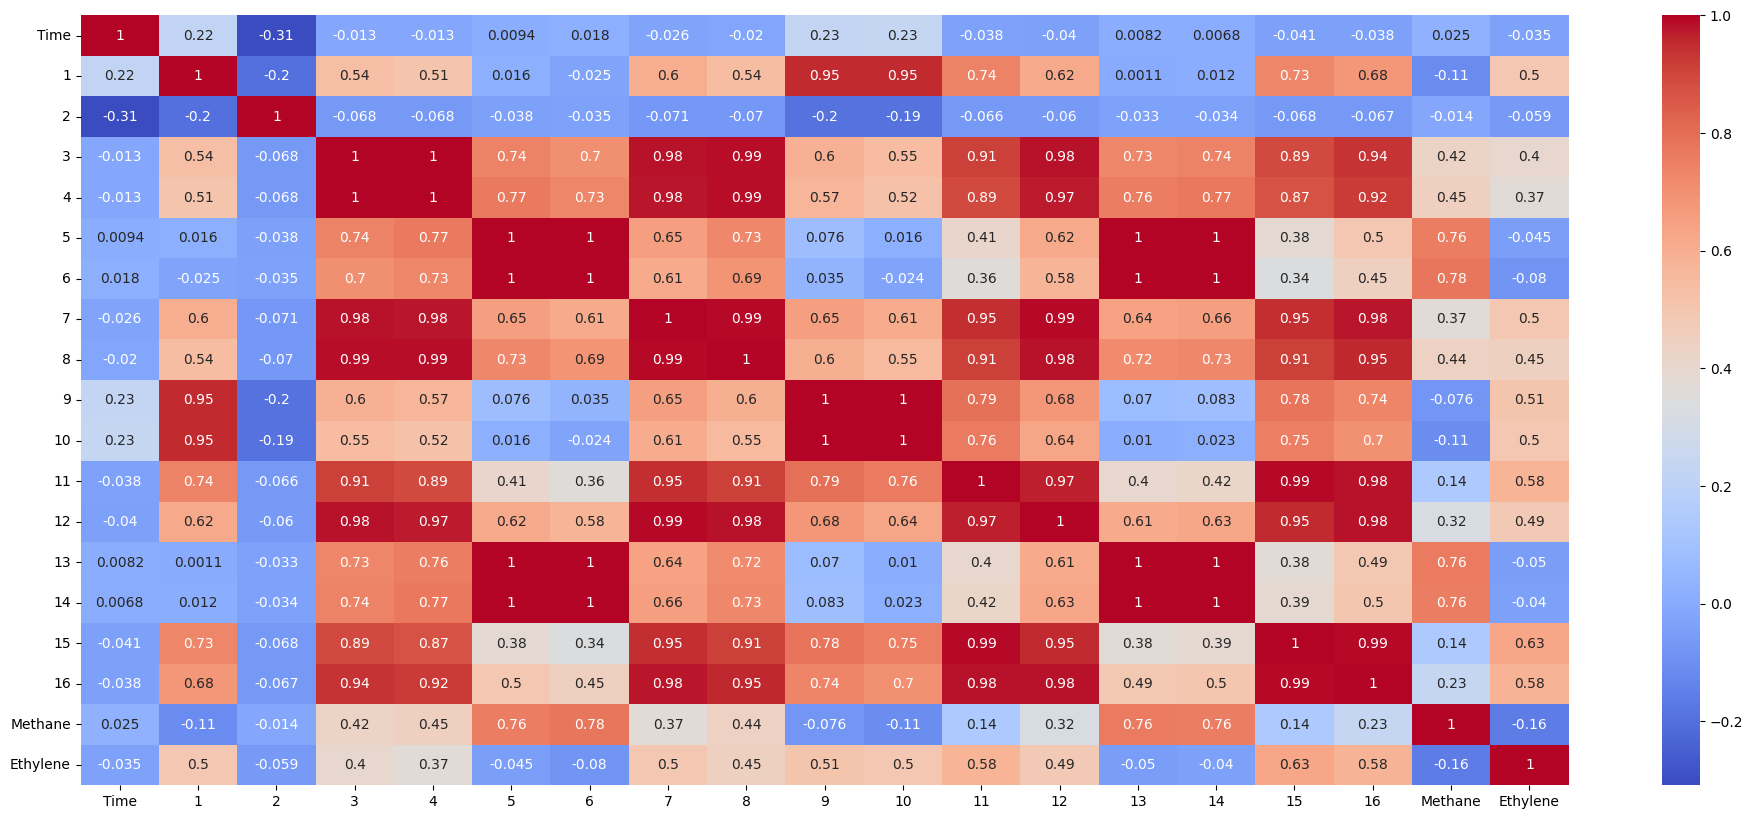

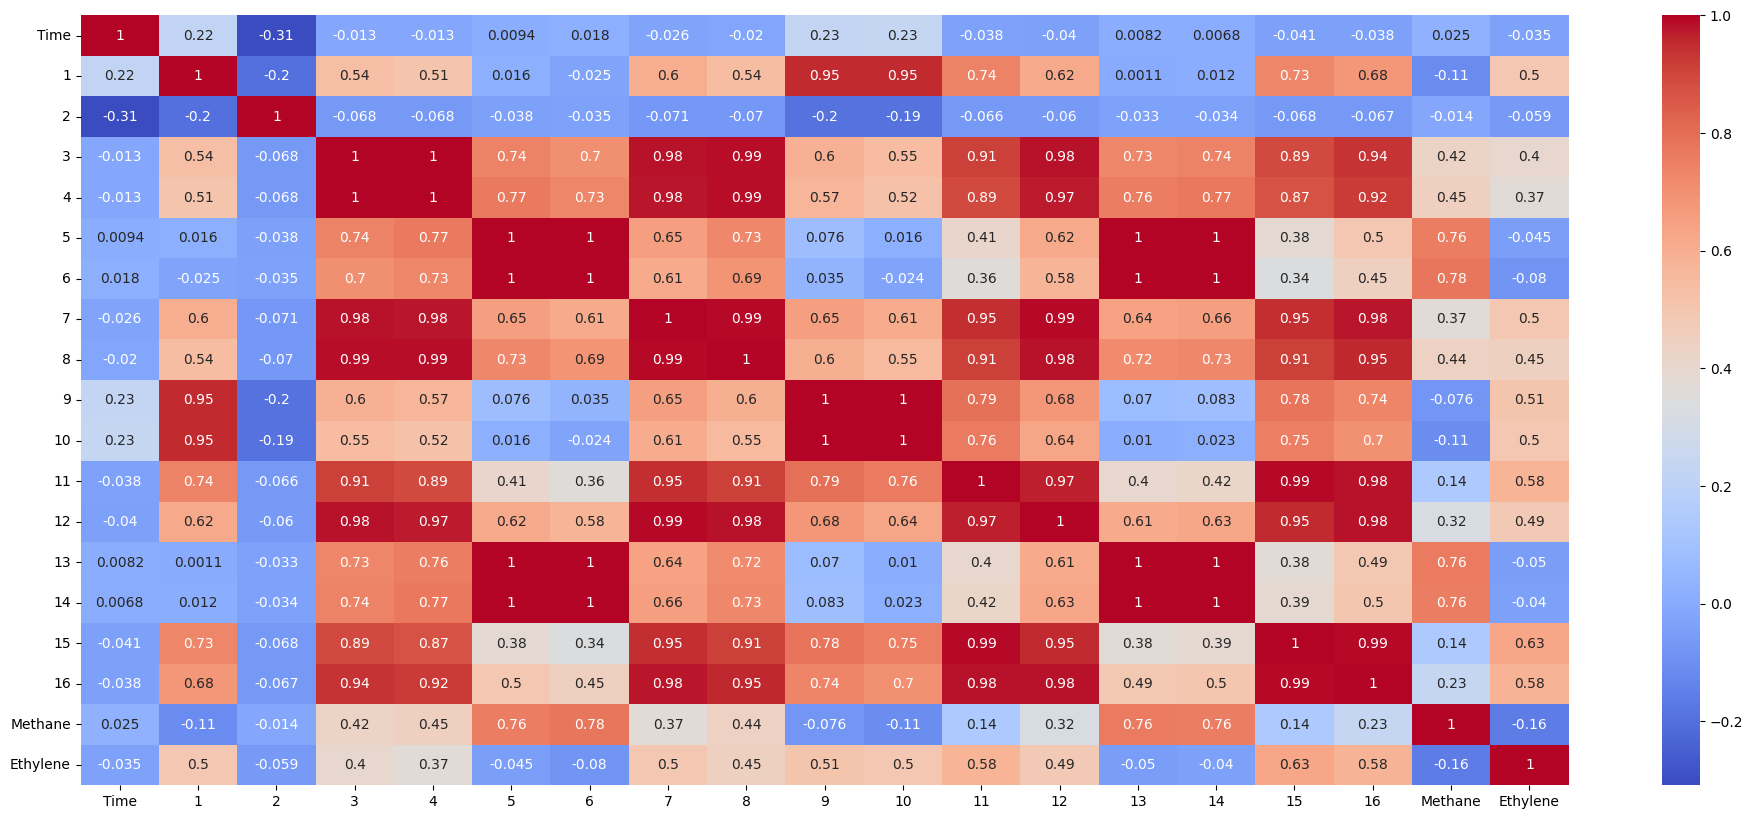

In [96]:
#define the size of the plot:
plt.figure(figsize=(24,10))
#plot heatmap plot of the correlated data frames:
sns.heatmap(train_standard_df_corr,cmap='coolwarm',annot=True)

plt.figure(figsize=(24,10))
sns.heatmap(train_robust_df_corr,cmap='coolwarm',annot=True)

In [128]:
df.iloc[:,0]

0              0.00
1              0.01
2              0.02
3              0.03
4              0.04
             ...   
4178499    41790.15
4178500    41790.16
4178501    41790.17
4178502    41790.18
4178503    41790.19
Name: Time, Length: 4178504, dtype: float64

In [130]:
df.iloc[:,0].name

'Time'

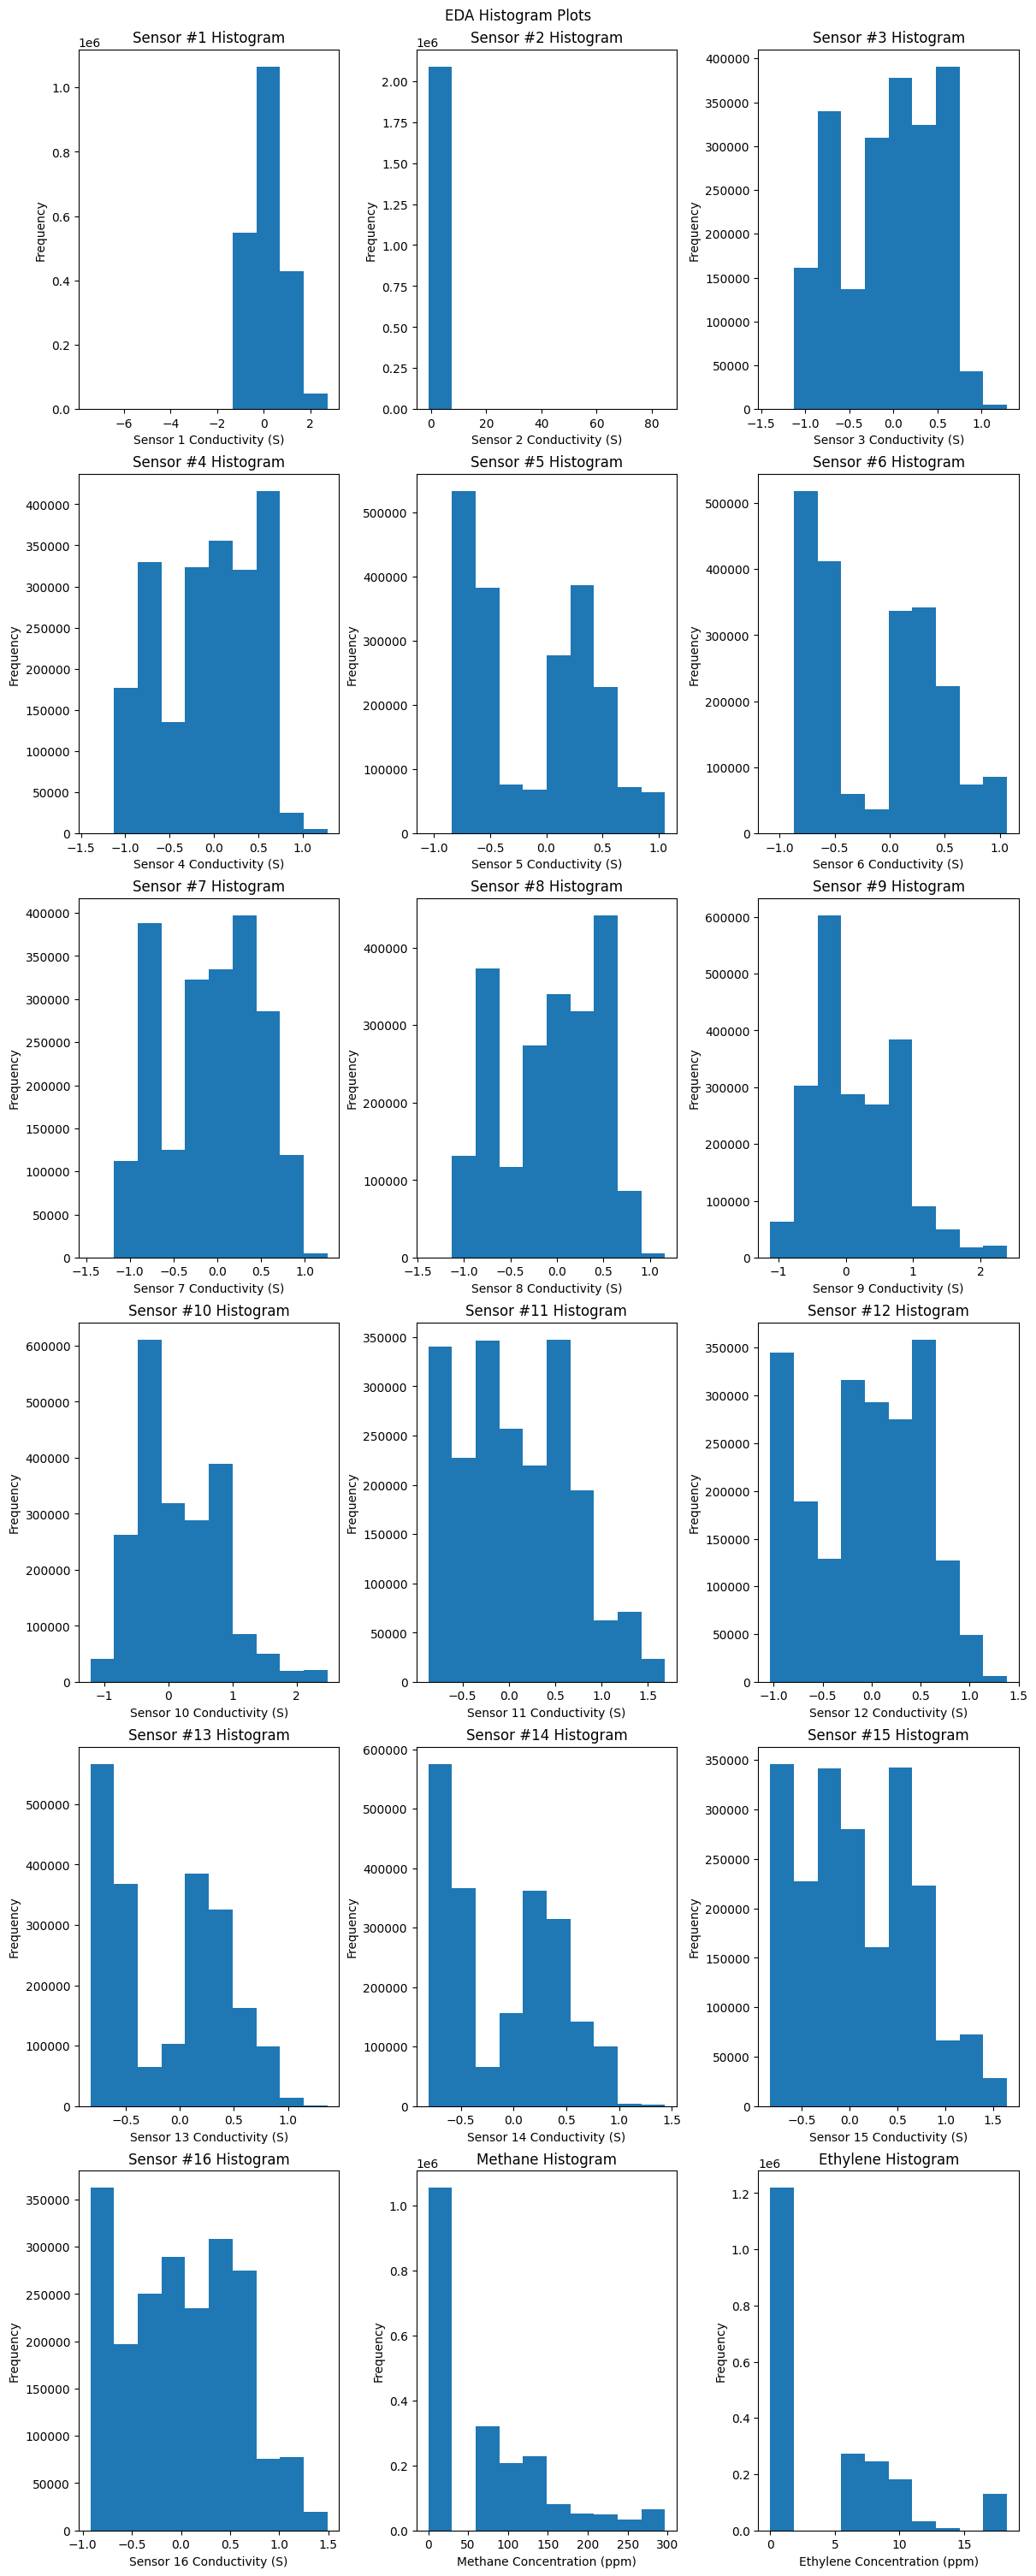

In [57]:
# Plot standard plots (all histograms + a time scatter plot)
fig = plt.figure(figsize = (12, 30), layout = "constrained")
fig.suptitle("EDA Histogram Plots")
for i in range(1, 19):
    ax1 = fig.add_subplot(18//3, 3, i)
    ax1.hist(train_robust_df.iloc[:,i])
    x_label_string = train_robust_df.iloc[:,i].name
    if i < 17:
        x_label_string = "Sensor " + x_label_string + " Conductivity (S)"
    else: 
        x_label_string = x_label_string + " Concentration (ppm)"
    ax1.set_xlabel(x_label_string)
    ax1.set_ylabel("Frequency")
    if i < 17:
        ax1.title.set_text("Sensor #" + train_robust_df.iloc[:,i].name + " Histogram")
    else:
        ax1.title.set_text(train_robust_df.iloc[:,i].name + " Histogram") 
plt.show()

In [49]:
import matplotlib

'#FF4500'

In [50]:

color_list = ["pink", "red", "maroon", "salmon", "orange", "yellow", "yellowgreen", "green", "cyan", "blue", "indigo", "violet", "gray", "black", "brown", "chocolate"]
colors = [matplotlib.colors.cnames[color] for color in color_list]

C:\Users\jacob\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


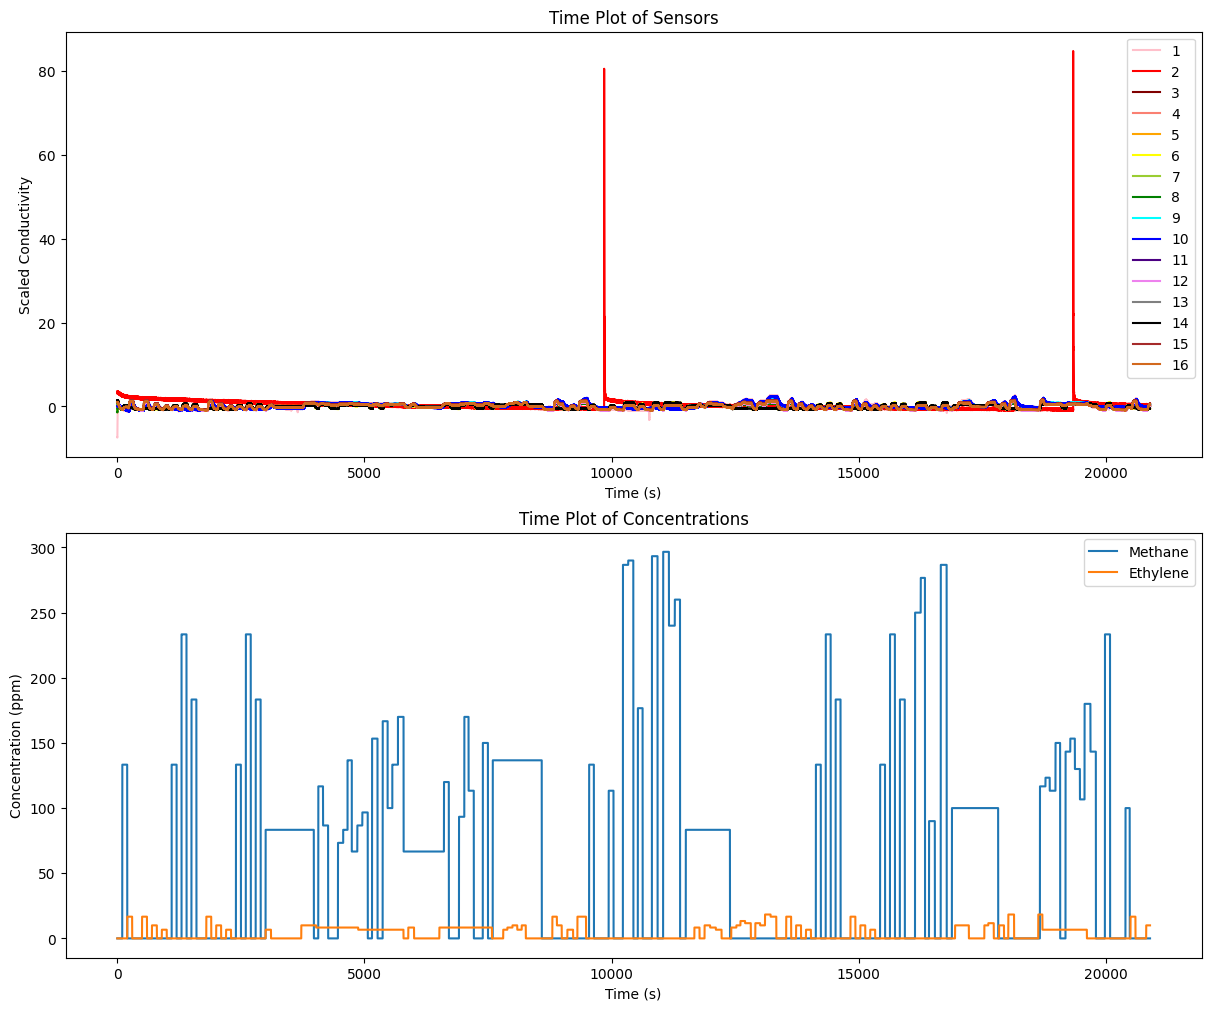

In [135]:
# Plot standard plots (all histograms + a time scatter plot)
fig_conduct = plt.figure(figsize = (12, 10), layout = "constrained")
ax_scatter_conduct = fig_conduct.add_subplot(2, 1, 1)
ax_scatter_concentration = fig_conduct.add_subplot(2, 1, 2)
# Cycler for conductivity plots

for i in range(1, 19):
    x_label_string = train_robust_df.iloc[:,i].name
    if i < 17:
        ax_scatter_conduct.plot(x1_train.iloc[:,0], train_robust_df.iloc[:,i], label = x_label_string, color = colors[i - 1])
        ax_scatter_conduct.legend()
        ax_scatter_conduct.set_xlabel("Time (s)")
        ax_scatter_conduct.set_ylabel("Scaled Conductivity")
        ax_scatter_conduct.title.set_text("Time Plot of Sensors") 
        ax_scatter_conduct.legend() 
    else:  
        ax_scatter_concentration.plot(x1_train.iloc[:,0], train_robust_df.iloc[:,i], label = x_label_string)
        ax_scatter_concentration.legend()
        ax_scatter_concentration.set_xlabel("Time (s)")
        ax_scatter_concentration.set_ylabel("Concentration (ppm)")
        ax_scatter_concentration.title.set_text("Time Plot of Concentrations")
        ax_scatter_concentration.legend()   
plt.show()

In [ ]:
# Make pairplots of standard scaled train datafrme
# sns.set(style='white', context='notebook')
g = sns.pairplot(train_robust_df)
plt.show()

Sensors 1, 9, and 10 correlated (drop sensors 9, 10)
Sensors 3, 4, 7, 8, 11, 12 correlated (drop sensors 4, 7, 8)
Sensors 11, 12 correlated (drop sensor 12)
Sensors 5, 6, 13, and 14 correlated (drop sensors 6, 13, and 14)
Sensors 15 and 16 correlated (drop sensors 16)
Sensor 2 is drifting / broken (drop sensor 2)
Keep sensors 1, 3, 5, 11, 15

In [19]:
meth_train_standard_df.shape

(3342803, 18)

# Remove collinear variables after EDA

In [106]:
# We need to remove collinear variables
drop_cols = ['Time', '2', '4', '6', '7', '8', '9', '10', '12', '13', '14', '16']
x_train_standard_reduced = pd.DataFrame(X_train_standard, columns = x_col_names).drop(drop_cols, axis = 1)
x_test_standard_reduced = pd.DataFrame(X_test_standard, columns = x_col_names).drop(drop_cols, axis = 1)
x_train_robust_reduced = pd.DataFrame(X_train_robust, columns = x_col_names).drop(drop_cols, axis = 1)
x_test_robust_reduced = pd.DataFrame(X_test_robust, columns = x_col_names).drop(drop_cols, axis = 1)
y_meth_train_reduced = y_meth_train
y_meth_test_reduced = y_meth_test
y_ethy_train_reduced = y_ethy_train
y_ethy_test_reduced = y_ethy_test

In [107]:
# Get values
x_train_standard_reduced_vals = x_train_standard_reduced.values
x_test_standard_reduced_vals = x_test_standard_reduced.values
x_train_robust_reduced_vals = x_train_robust_reduced.values
x_test_robust_reduced_vals = x_test_robust_reduced.values
y_meth_train_vals = y_meth_train.values
y_meth_test_vals = y_meth_test.values
y_ethy_train_vals = y_ethy_train.values
y_ethy_test_vals = y_ethy_test.values

In [108]:
# Check some shapes
x_train_standard_reduced.shape

(2089252, 5)

# Define Functions To Make ML Training Easier

In [110]:
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [111]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

In [112]:
def get_main_metrics(actual, predict):
  '''Returns a tuple containing RMSE, RMSE / mean, RMSE / range, MAPE, and MAE'''
  # Calculate rmse
  rmse = mean_squared_error(actual, predict, squared = False)

  # Calculate mean and range
  mean = np.mean(actual)
  range_val = max(actual) - min(actual)

  # Calculate MAPE and MAE
  mape = mean_absolute_percentage_error(actual, predict)
  mae = mean_absolute_error(actual, predict)
  return (rmse, rmse/mean, rmse/range_val, mape, mae)

In [113]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPRegressor

In [114]:
def optimize_model(model, param_grid, scoring, get_metrics, cv, verbose, n_jobs, x_train, y_train, x_test, y_test):
  """Optimizes a model given a parameter grid and a scaler using GridSearchCV"""
  try:
    grid = GridSearchCV(estimator= model,
                      param_grid = param_grid,
                      scoring=scoring,
                      cv=cv, 
                      verbose = verbose,
                      n_jobs=n_jobs)
    # Run fit on the GridSearchCV which will search for the best parameters
    grid_results = grid.fit(x_train, y_train)
    # Run predictions on the test dataset
    best_model_predictions = grid.predict(x_test)
    metrics = None
    if get_metrics:
        metrics = get_main_metrics(y_test, best_model_predictions)
    return (grid_results, best_model_predictions, metrics, grid_results.best_params_, grid_results.best_score_)
  except Exception as e:
    return ["error",[],str(e)]

In [70]:
def optimize_halving_model(model, param_grid, scoring, get_metrics, cv, verbose, n_jobs, x_train, y_train, x_test, y_test):
  """Optimizes a model given a parameter grid and a scaler using HalvingGridSearchCV"""
  try:
    grid = HalvingGridSearchCV(estimator= model,
                      param_grid = param_grid,
                      scoring=scoring,
                      cv=cv, 
                      verbose = verbose,
                      n_jobs=n_jobs)
    # Run fit on the GridSearchCV which will search for the best parameters
    grid_results = grid.fit(x_train, y_train)
    # Run predictions on the test dataset
    best_model_predictions = grid.predict(x_test)
    metrics = None
    if get_metrics:
        metrics = get_main_metrics(y_test, best_model_predictions)
    return (grid_results, best_model_predictions, metrics, grid_results.best_params_, grid_results.best_score_)
  except Exception as e:
    return ["error",[],str(e)]

In [71]:
def optimize_randomized_model(model, param_grid, scoring, get_metrics, cv, verbose, n_jobs, x_train, y_train, x_test, y_test):
  """Optimizes a model given a parameter grid and a scaler using RandomSearchCV"""
  try:
    grid = RandomizedSearchCV(estimator= model,
                      param_grid = param_grid,
                      scoring=scoring,
                      cv=cv, 
                      verbose = verbose,
                      n_jobs=n_jobs)
    # Run fit on the GridSearchCV which will search for the best parameters
    grid_results = grid.fit(x_train, y_train)
    # Run predictions on the test dataset
    best_model_predictions = grid.predict(x_test)
    metrics = None
    if get_metrics:
        metrics = get_main_metrics(y_test, best_model_predictions)
    return (grid_results, best_model_predictions, metrics, grid_results.best_params_, grid_results.best_score_)
  except Exception as e:
    return ["error",[],str(e)]

In [72]:
print(x_train_robust_reduced)

                1         2         3         5        11        15
0       -7.391118  3.340090 -1.391543 -1.041451  1.199643  0.965309
1       -7.404867  3.342611 -1.387445 -1.051432  1.189910  0.963950
2       -7.373414  3.215839 -1.378997 -1.046951  1.185047  0.967053
3       -7.416608  3.193467 -1.389071 -1.049501  1.190921  0.967636
4       -7.376882  3.482197 -1.391079 -1.043155  1.184239  0.987883
...           ...       ...       ...       ...       ...       ...
2089247  0.541779  0.129923  0.074788 -0.572199  0.587383  0.683705
2089248  0.541779  0.179603  0.075452 -0.571918  0.577012  0.697727
2089249  0.520669  0.132339  0.074788 -0.570981  0.592315  0.694079
2089250  0.544913  0.092112  0.075319 -0.571918  0.584219  0.687520
2089251  0.526935  0.075622  0.065422 -0.570890  0.584042  0.690251

[2089252 rows x 6 columns]


In [ ]:
# Run Isolation Forest on Scaled Data

In [74]:
from sklearn.ensemble import IsolationForest

In [ ]:
isolation_forest_param_grid = {
    "contamination": [0.001, 0.005, 0.01, 0.05, 0.1, 0.5],
    "n_estimators": [50, 100, 200],
    "random_state": [42]
}

In [125]:
print("Doing 5-fold cross validation on isolation forest")
optim_if_robust = optimize_model(IsolationForest(), isolation_forest_param_grid, "neg_mean_absolute_error", False, 5, 10, -1, x_train_robust_reduced_vals, y_meth_train_vals, x_train_robust_reduced_vals, y_meth_train_vals)
print(optim_if_robust[2:])

Doing 5-fold cross validation on isolation forest
Fitting 5 folds for each of 18 candidates, totalling 90 fits
(None, {'contamination': 0.001, 'n_estimators': 50, 'random_state': 42}, -66.29020571018448)


In [115]:
isolation_forest_params = {
    'contamination': 0.1,
    'n_estimators': 50, 
    'random_state': 42,
    'verbose': 1
}

In [116]:
# Create isolation forests.
standard_if = IsolationForest(**isolation_forest_params)
robust_if = IsolationForest(**isolation_forest_params)

In [117]:
# Fit the models
standard_if.fit(x_train_standard_reduced_vals)
robust_if.fit(x_train_robust_reduced_vals)

IsolationForest(contamination=0.001, n_estimators=50, random_state=42,
                verbose=1)

In [118]:
print(x_train_standard_reduced_vals.shape, x_train_robust_reduced_vals.shape)

(2089252, 5) (2089252, 5)


# Get the Outliers from the Isolation Forests and remove them from the data sets

In [119]:
# Get the predictions from each
standard_outliers = standard_if.predict(x_train_standard_reduced_vals)
robust_outliers = robust_if.predict(x_train_robust_reduced_vals)

In [120]:
print(standard_outliers.shape, robust_outliers.shape)

(2089252,) (2089252,)


In [126]:
# Get the data without the outliers
x_train_standard_preprocessed, y_meth_train_standard_preprocessed, y_ethy_train_standard_preprocessed = x_train_standard_reduced_vals[(standard_outliers != -1), :], y_meth_train_vals[(standard_outliers != -1)], y_ethy_train_vals[(standard_outliers != -1)]
x_train_robust_preprocessed, y_meth_train_robust_preprocessed, y_ethy_train_robust_preprocessed = x_train_robust_reduced_vals[(robust_outliers != -1), :], y_meth_train_vals[(robust_outliers != -1)], y_ethy_train_vals[(robust_outliers != -1)]

In [127]:
x_train_standard_reduced_vals[(standard_outliers == -1),0].shape

(2079,)

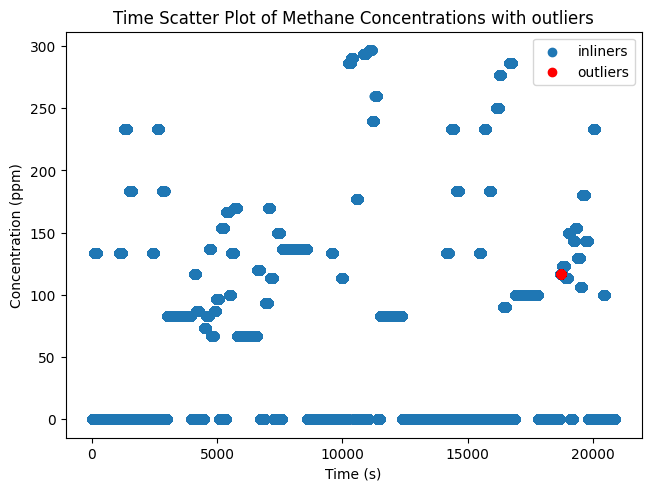

In [142]:
# print(x_train_standard_robust_vals[(robust_outliers != -1),0].shape, y_meth_train_vals[(robust_outliers != -1)].shape)
# Plot the outliers
fig = plt.figure(layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(x1_train['Time'].values[(robust_outliers != -1)], y_meth_train_vals[(robust_outliers != -1)], label = "inliners")
ax1.scatter(x1_train['Time'].values[(robust_outliers == -1)], y_meth_train_vals[(robust_outliers == -1)], c = 'red', label = "outliers")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Concentration (ppm)")
ax1.title.set_text("Time Scatter Plot of Methane Concentrations with outliers")
ax1.legend()

In [81]:
model_collections = {}

In [131]:
x_train_robust_preprocessed

array([[-7.39111787, -1.39154256, -1.04145139,  1.19964254,  0.96530921],
       [-7.40486692, -1.38744532, -1.05143246,  1.18991019,  0.96395004],
       [-7.37341445, -1.37899744, -1.04695097,  1.18504718,  0.96705305],
       ...,
       [ 0.5206692 ,  0.07478785, -0.57098069,  0.59231517,  0.69407865],
       [ 0.54491255,  0.07531853, -0.57191791,  0.58421857,  0.68752003],
       [ 0.52693536,  0.06542204, -0.5708903 ,  0.58404173,  0.69025119]])

# Run Linear SVR

In [132]:
linear_svr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1, 10],
    'verbose': [1],
}

In [133]:
optim_lsvr_meth_robust = optimize_halving_model(LinearSVR(), linear_svr_param_grid, "neg_root_mean_squared_error", True, 5, 10, -1,x_train_robust_preprocessed, y_meth_train_robust_preprocessed, x_test_robust_reduced_vals, y_meth_test_vals)
print(optim_lsvr_meth_robust[2:])
model_collections["optim_lsvr_meth_robust"] = optim_lsvr_meth_robust
optim_lsvr_ethy_robust = optimize_halving_model(LinearSVR(), linear_svr_param_grid, "neg_root_mean_squared_error", True, 5, 10, -1, x_train_robust_preprocessed, y_ethy_train_robust_preprocessed, x_test_robust_reduced_vals, y_ethy_test_vals)
print(optim_lsvr_ethy_robust[2:])
model_collections["optim_lsvr_ethy_robust"] = optim_lsvr_ethy_robust

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 231908
max_resources_: 2087173
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 20
n_resources: 231908
Fitting 5 folds for each of 20 candidates, totalling 100 fits
----------
iter: 1
n_candidates: 7
n_resources: 695724
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 2
n_candidates: 3
n_resources: 2087172
Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[LibLinear]((47.023003960112646, 0.9425779418259259, 0.15850272680120217, 4.638795178113181e+16, 24.573986065721467), {'C': 10, 'epsilon': 10, 'verbose': 1}, -47.7055816263878)
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 231908
max_resources_: 2087173
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 20
n_resources: 231908
Fitting 5 folds for each of 20 candidates, totalling 100 fits
----------
iter: 1
n_candidates: 7
n_resources: 695724
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 2
n_candidates: 3
n_resources: 2087172
Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[LibLinear]

c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


((3.784874362217977, 0.8018264728613751, 0.18924371811089885, 4496837181839814.5, 2.072670254198573), {'C': 100, 'epsilon': 1, 'verbose': 1}, -3.5313682143810325)


In [134]:
# Save the models to be reused
import joblib
joblib.dump(optim_lsvr_meth_robust[0], "models/optim_lsvr_meth_robust.pkl")
joblib.dump(optim_lsvr_ethy_robust[0], "models/optim_lsvr_ethy_robust.pkl")

['models/optim_lsvr_ethy_robust.pkl']

Text(0.5, 1.0, 'Predicted vs Actual for Methane LSVR')

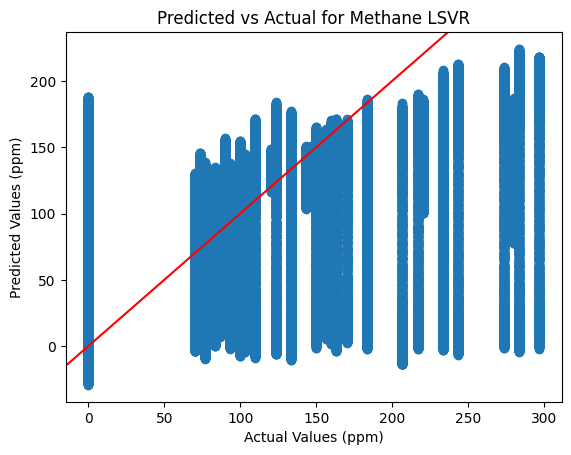

In [138]:
# Plot actual vs predicted for lsvr
plt.scatter(y_meth_test_vals, optim_lsvr_meth_robust[1])
plt.axline((0,0), slope=1, c = 'r')
plt.xlabel("Actual Values (ppm)")
plt.ylabel("Predicted Values (ppm)")
plt.title("Predicted vs Actual for Methane LSVR")

Text(0.5, 1.0, 'Predicted vs Actual for Ethylene LSVR')

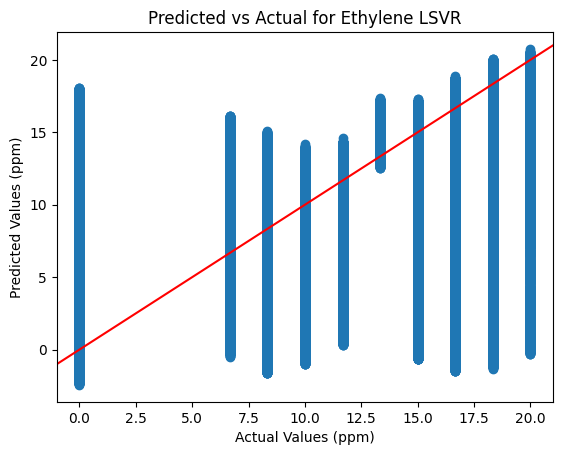

In [139]:
# Plot actual vs predicted for lsvr
plt.scatter(y_ethy_test_vals, optim_lsvr_ethy_robust[1])
plt.axline((0,0), slope=1, c = 'r')
plt.xlabel("Actual Values (ppm)")
plt.ylabel("Predicted Values (ppm)")
plt.title("Predicted vs Actual for Ethylene LSVR")

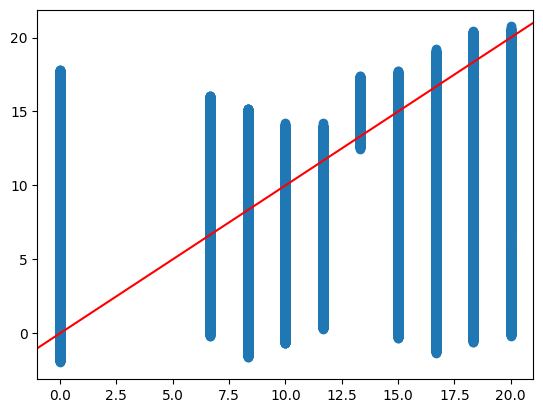

In [94]:
plt.scatter(y_ethy_test_vals, optim_lsvr_ethy_robust[1])
plt.axline((0,0), slope=1, c = 'r')

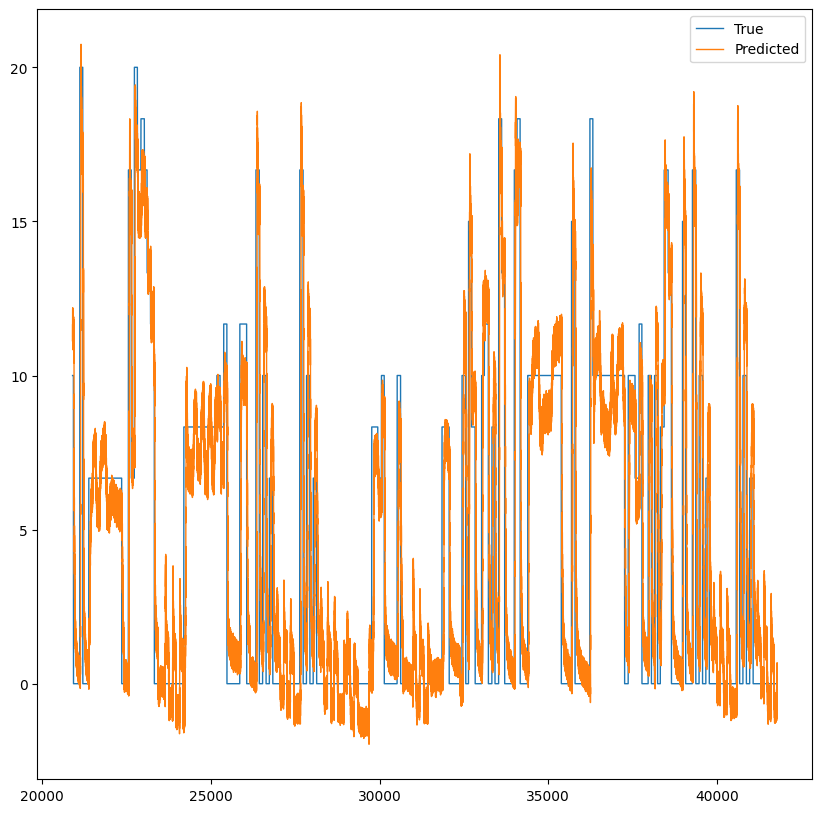

In [105]:
plt.figure(figsize=(10,10))
plt.plot(x1_test['Time'].values, y_ethy_test_vals, label = "True", linewidth=1)
plt.plot(x1_test['Time'].values, optim_lsvr_ethy_robust[1], label = "Predicted",linewidth=1)
plt.legend()

# Run Gradient Boosting

In [143]:
from sklearn.ensemble import GradientBoostingRegressor

In [144]:
gradient_boosting_param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [30, 40, 50, 60, 70, 80, 90],
    'loss': ["huber"],
    'max_depth': [2, 3, 4],
    'max_features': [3, 4, 5, 6],
}

In [242]:
optim_gb_meth_robust = optimize_halving_model(GradientBoostingRegressor(), gradient_boosting_param_grid, "neg_root_mean_squared_error", True, 5, 10, -1,x_train_robust_preprocessed, y_meth_train_robust_preprocessed, x_test_robust_reduced_vals, y_meth_test_vals)
print(optim_gb_meth_robust[2:])
model_collections["optim_gb_meth_robust"] = optim_gb_meth_robust

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 8589
max_resources_: 2087173
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 252
n_resources: 8589
Fitting 5 folds for each of 252 candidates, totalling 1260 fits
----------
iter: 1
n_candidates: 84
n_resources: 25767
Fitting 5 folds for each of 84 candidates, totalling 420 fits
----------
iter: 2
n_candidates: 28
n_resources: 77301
Fitting 5 folds for each of 28 candidates, totalling 140 fits
----------
iter: 3
n_candidates: 10
n_resources: 231903
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 4
n_candidates: 4
n_resources: 695709
Fitting 5 folds for each of 4 candidates, totalling 20 fits
((50.25234409996536, 1.0073101904304647, 0.1693880206962799, 4.506456145874253e+16, 20.39174357745011), {'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 2, 'max_features': 4, 'n_estimators': 80}, -46.3015038672389)


In [190]:
# Run the models
optim_gb_ethy_robust = optimize_halving_model(GradientBoostingRegressor(), gradient_boosting_param_grid, "neg_root_mean_squared_error", True, 5, 10, -1, x_train_robust_preprocessed, y_ethy_train_robust_preprocessed, x_test_robust_reduced_vals, y_ethy_test_vals)
print(optim_gb_ethy_robust[2:])
model_collections["optim_gb_ethy_robust"] = optim_gb_ethy_robust

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 8589
max_resources_: 2087173
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 252
n_resources: 8589
Fitting 5 folds for each of 252 candidates, totalling 1260 fits


['A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.']
n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 8589
max_resources_: 2087173
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 252
n_resources: 8589
Fitting 5 folds for each of 252 candidates, totalling 1260 fits
----------
iter: 1
n_candidates: 84
n_resources: 25767
Fitting 5 folds for each of 84 candidates, totalling 420 fits
----------
iter: 2
n_candidates: 28
n_resources: 77301
Fitting 5 folds for each of 28 candidates, totalling 140 fits
----------
iter: 3
n_candidates: 10
n_resources: 231903
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 4
n_candidates: 4
n_resources: 695709
Fitting 5 folds for each of 4 candidates, totalling 20 fits
((3.8903809689070568, 0.8241780708825844, 0.19451904844535284, 2803184289891415.0, 2.1461625065846808), {'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 

In [191]:
# Save the models to be reused
joblib.dump(optim_gb_meth_robust[0], "models/optim_gb_meth_robust.pkl")
joblib.dump(optim_gb_ethy_robust[0], "models/optim_gb_ethy_robust.pkl")

['models/optim_gb_ethy_robust.pkl']

In [240]:
model_collections.keys()

dict_keys(['optim_lsvr_meth_robust', 'optim_lsvr_ethy_robust', 'optim_gb_meth_robust', 'optim_gb_ethy_robust'])

In [239]:
print(model_collections)

{'optim_lsvr_meth_robust': (HalvingGridSearchCV(estimator=LinearSVR(), n_jobs=-1,
                    param_grid={'C': [0.01, 0.1, 1, 10, 100],
                                'epsilon': [0.01, 0.1, 1, 10], 'verbose': [1]},
                    scoring='neg_root_mean_squared_error', verbose=10), array([ 1.54982066,  2.53858336, -0.87573419, ..., 23.92930979,
       27.73934872, 24.80125475]), (47.023003960112646, 0.9425779418259259, 0.15850272680120217, 4.638795178113181e+16, 24.573986065721467), {'C': 10, 'epsilon': 10, 'verbose': 1}, -47.7055816263878), 'optim_lsvr_ethy_robust': (HalvingGridSearchCV(estimator=LinearSVR(), n_jobs=-1,
                    param_grid={'C': [0.01, 0.1, 1, 10, 100],
                                'epsilon': [0.01, 0.1, 1, 10], 'verbose': [1]},
                    scoring='neg_root_mean_squared_error', verbose=10), array([11.47259113, 11.12192518, 11.44507608, ..., -0.22071378,
       -0.15970919, -0.26884369]), (3.784874362217977, 0.8018264728613751, 0.189

C:\Users\jacob\AppData\Local\Temp\ipykernel_32420\3156113772.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(best_model_labels, rotation = 45)
C:\Users\jacob\AppData\Local\Temp\ipykernel_32420\3156113772.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(best_model_labels, rotation = 45)
C:\Users\jacob\AppData\Local\Temp\ipykernel_32420\3156113772.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(best_model_labels, rotation = 45)
C:\Users\jacob\AppData\Local\Temp\ipykernel_32420\3156113772.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(best_model_labels, rotation = 45)
C:\Users\jacob\AppData\Local\Temp\ipykernel_32420\3156113772.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(best_model_labels, rotation = 45)


Text(0.5, 1.0, 'MAE of Hypertuned Models')

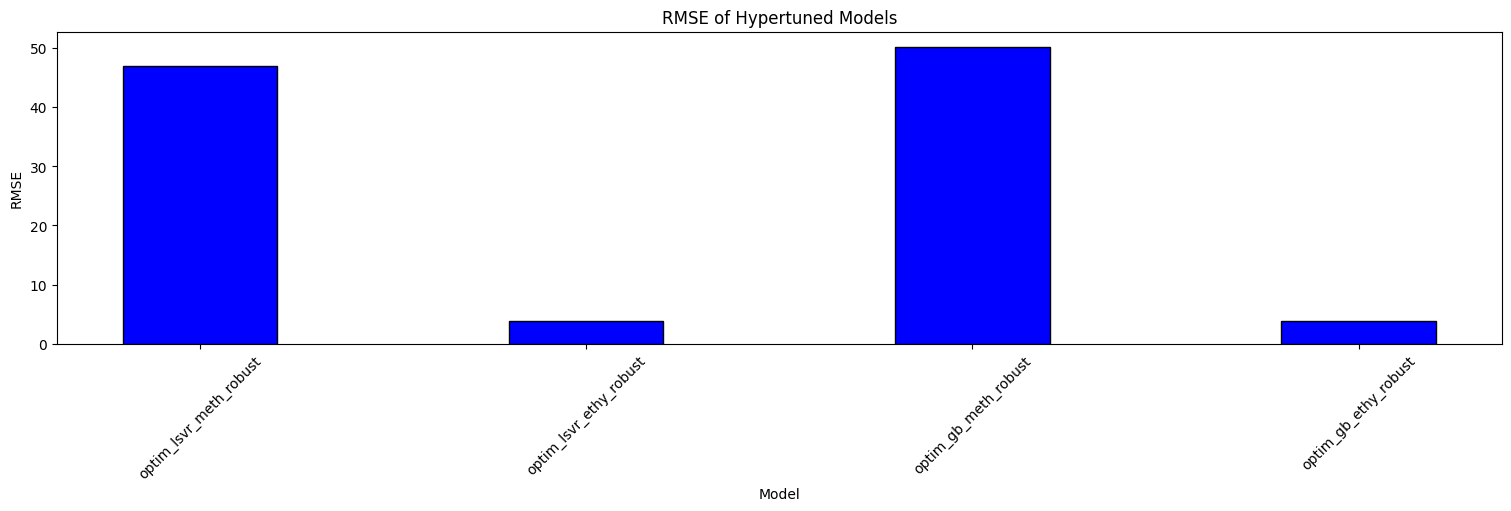

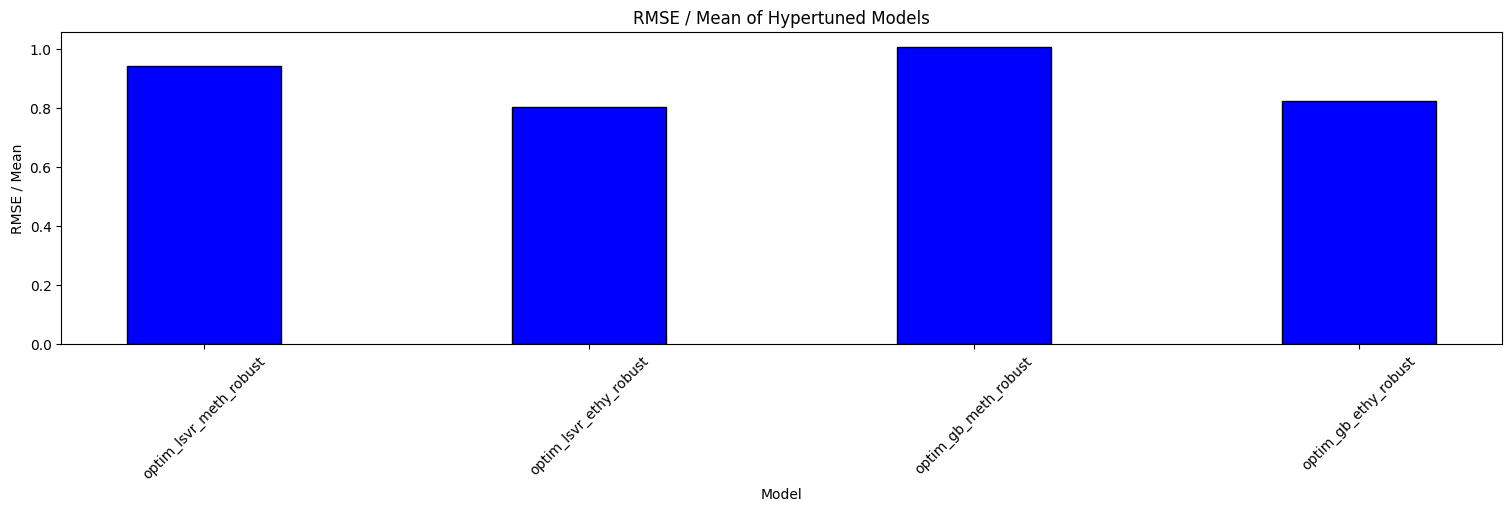

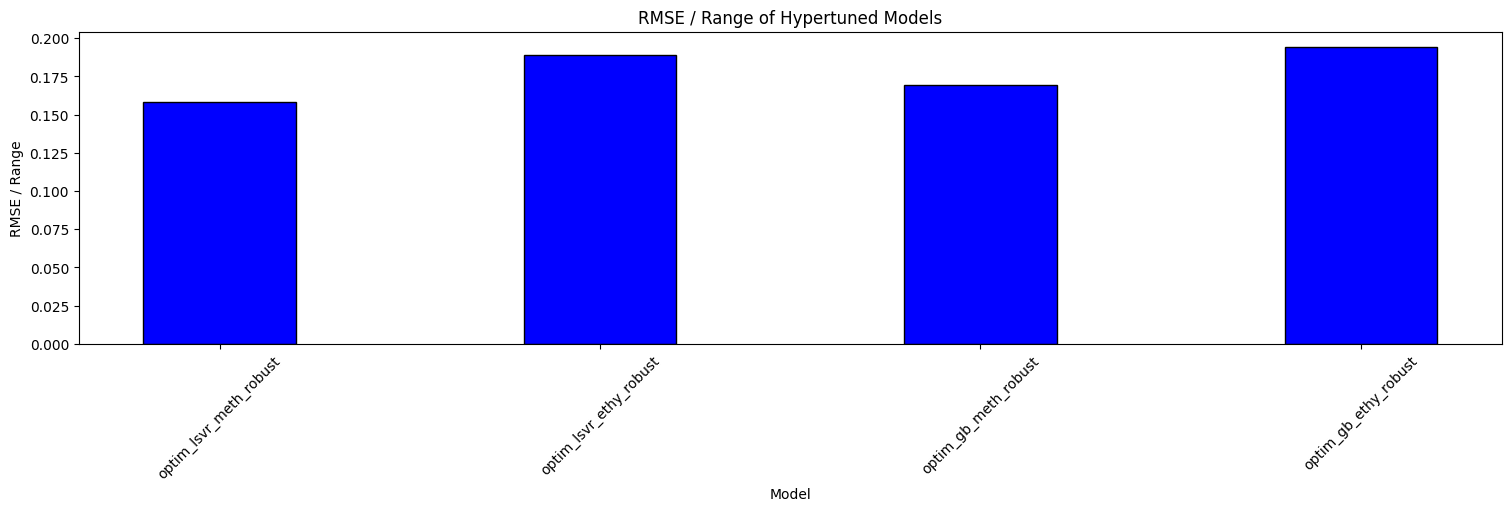

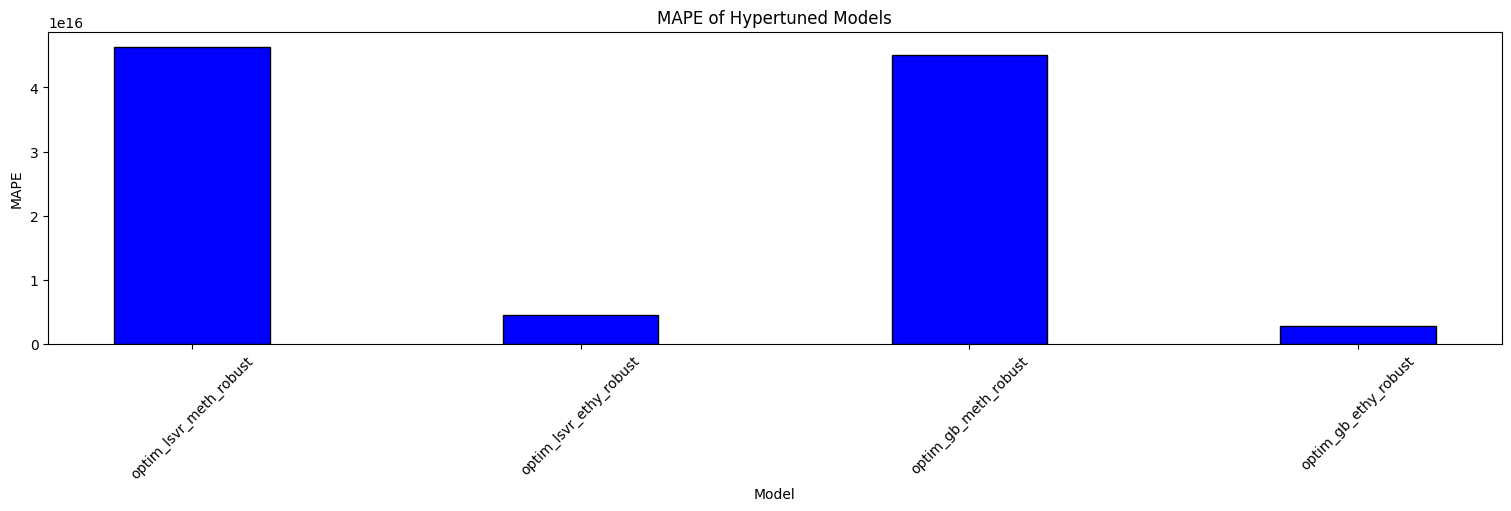

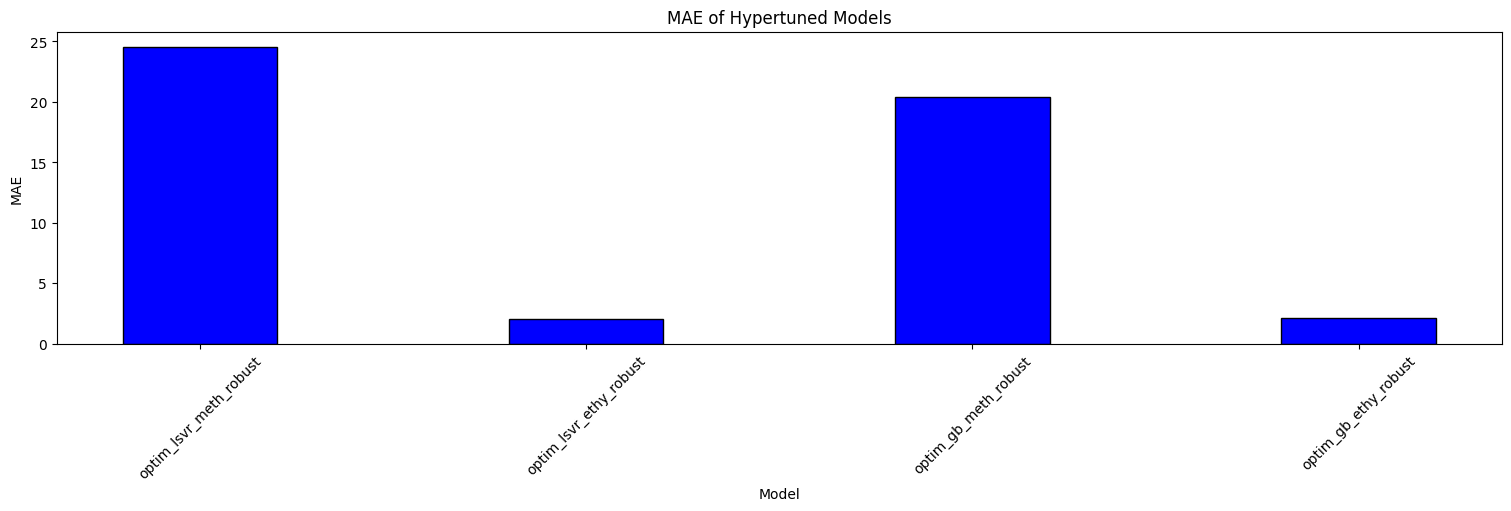

In [260]:
# Get Plots of the model data
best_model_labels = model_collections.keys()
rmses = [model_collections[label][2][0] for label in best_model_labels]

rmses_div_mean = [model_collections[label][2][1] for label in best_model_labels]
rmses_div_range = [model_collections[label][2][2] for label in best_model_labels]
mapes = [model_collections[label][2][3] for label in best_model_labels]
maes = [model_collections[label][2][4] for label in best_model_labels]

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, rmses, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("RMSE")
ax1.set_xlabel("Model")
ax1.set_title("RMSE of Hypertuned Models")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, rmses_div_mean, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("RMSE / Mean")
ax1.set_xlabel("Model")
ax1.set_title("RMSE / Mean of Hypertuned Models")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, rmses_div_range, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("RMSE / Range")
ax1.set_xlabel("Model")
ax1.set_title("RMSE / Range of Hypertuned Models")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, mapes, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("MAPE")
ax1.set_xlabel("Model")
ax1.set_title("MAPE of Hypertuned Models")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, maes, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("MAE")
ax1.set_xlabel("Model")
ax1.set_title("MAE of Hypertuned Models")

In [250]:
best_model_labels

dict_keys(['optim_lsvr_meth_robust', 'optim_lsvr_ethy_robust', 'optim_gb_meth_robust', 'optim_gb_ethy_robust'])

In [254]:
x_test_sets = [x_test_robust_reduced_vals, x_test_standard_reduced_vals, 
               x_test_robust_reduced_vals, x_test_robust_reduced_vals,
            ]
y_test_sets = [y_meth_test_vals, y_ethy_test_vals,
               y_meth_test_vals, y_ethy_test_vals,
              ] 
predictions = []
residuals = []
for i in range(len(model_collections)):
    curr_best_model_label = list(best_model_labels)[i]
    curr_best_model = model_collections[curr_best_model_label][0]
    curr_x_test = x_test_sets[i]
    curr_y_test = y_test_sets[i]

    y_predictions = curr_best_model.predict(curr_x_test)
    # y_predictions = best_model_collections[i][1]
    predictions.append(y_predictions)
    # print(y_predictions.shape, len(y_predictions))
    # print(curr_y_test.shape, len(curr_y_test))
    # if len(y_predictions) > 100000:
    #   print(y_predictions, y_residuals)
    y_residuals = curr_y_test - y_predictions
    residuals.append(y_residuals)


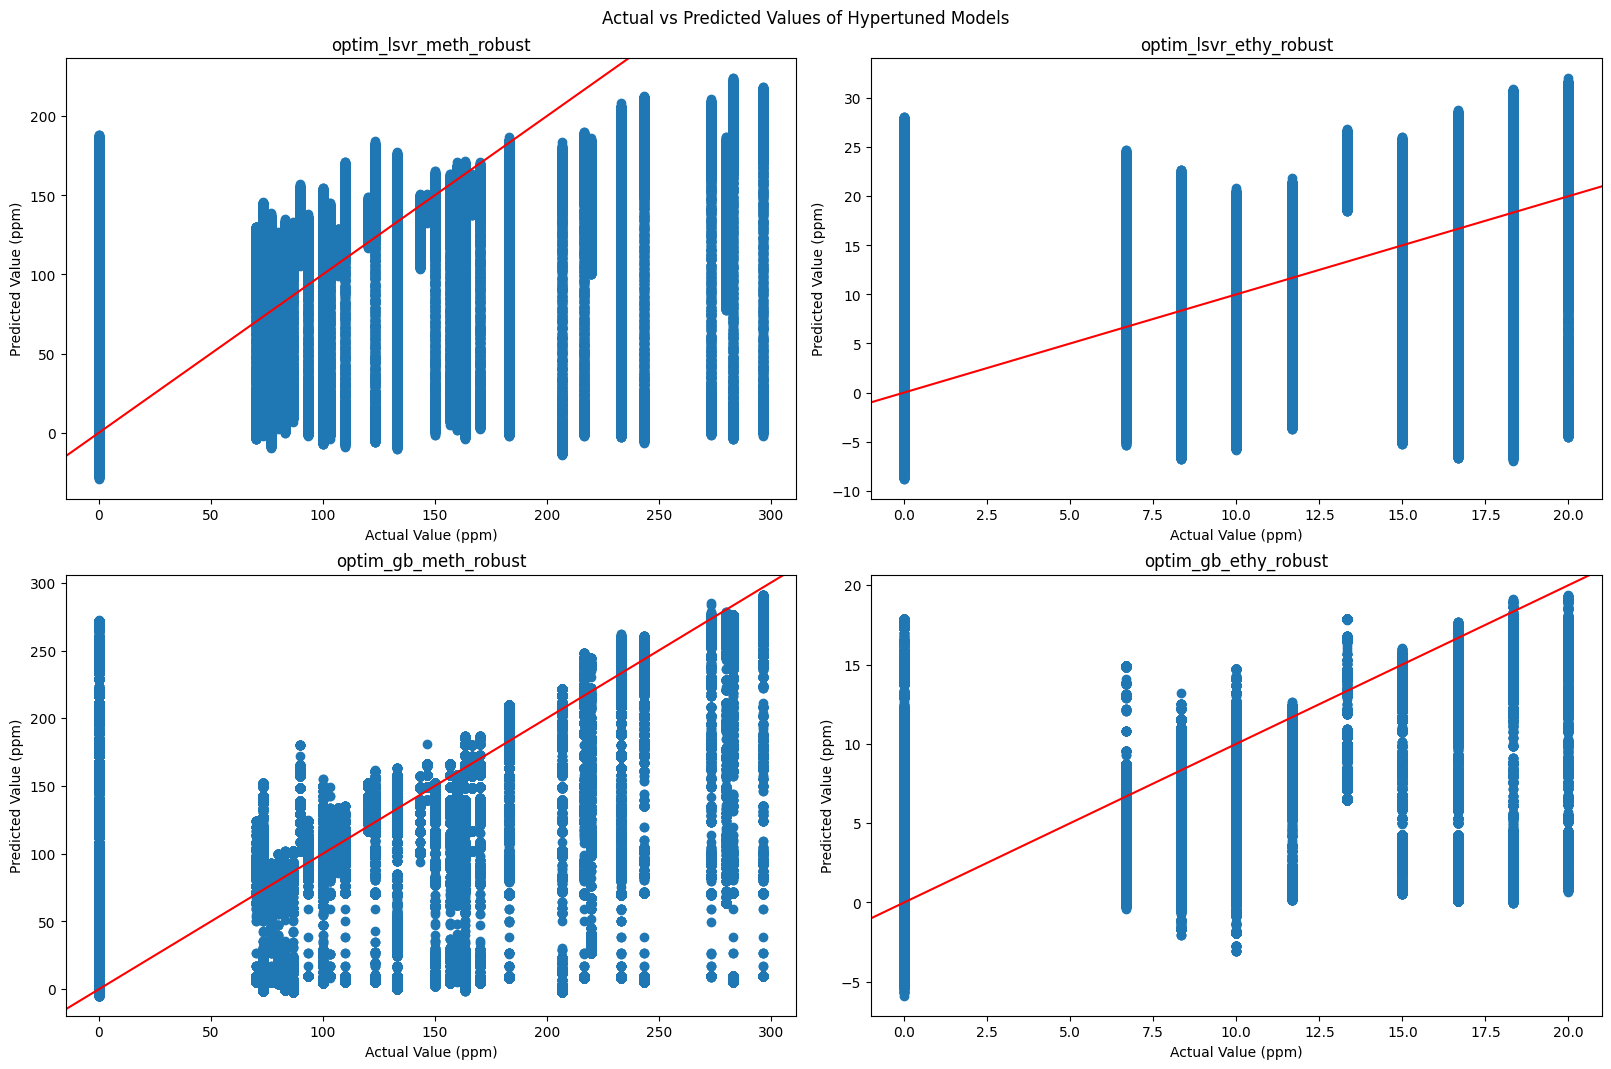

In [257]:
# Make plots of actual vs predicted values
fig = plt.figure(figsize=(16, 15), layout = "constrained")
fig.suptitle("Actual vs Predicted Values of Hypertuned Models")
for i in range(len(model_collections)):
  curr_best_model_label = list(best_model_labels)[i]
  curr_best_model = model_collections[curr_best_model_label][0]
  # print(curr_best_model)
  curr_x_test = x_test_sets[i]
  curr_y_test = y_test_sets[i]

  ax1 = fig.add_subplot(len(model_collections)//2 + 1, 2, i + 1)
  ax1.set_ylabel("Predicted Value (ppm)")
  ax1.set_xlabel("Actual Value (ppm)")
  ax1.title.set_text(curr_best_model_label)
  # Plot the predicted y values vs the actual y values
  ax1.scatter(curr_y_test, predictions[i])
  # Plot the line y = x
  ax1.axline((0, 0), slope=1, color = "r")
  # Make sure that the axes are the same
  # ax1.set_aspect('equal', adjustable='box')
plt.show()

(2089252,) [ -1.54982066  -2.53858336   0.87573419 ... -23.92930979 -27.73934872
 -24.80125475]
(2089252,) [-6.22892401 -5.63914122 -6.18955302 ...  4.52869854  4.43895276
  4.61521999]
(2089252,) [ -1.91687574  -1.78283531  -1.78283531 ... -69.46236989 -69.46236989
 -69.46236989]
(2089252,) [ 0.89915872  1.2089013   1.2089013  ... -0.41870158 -0.41870158
 -0.41870158]


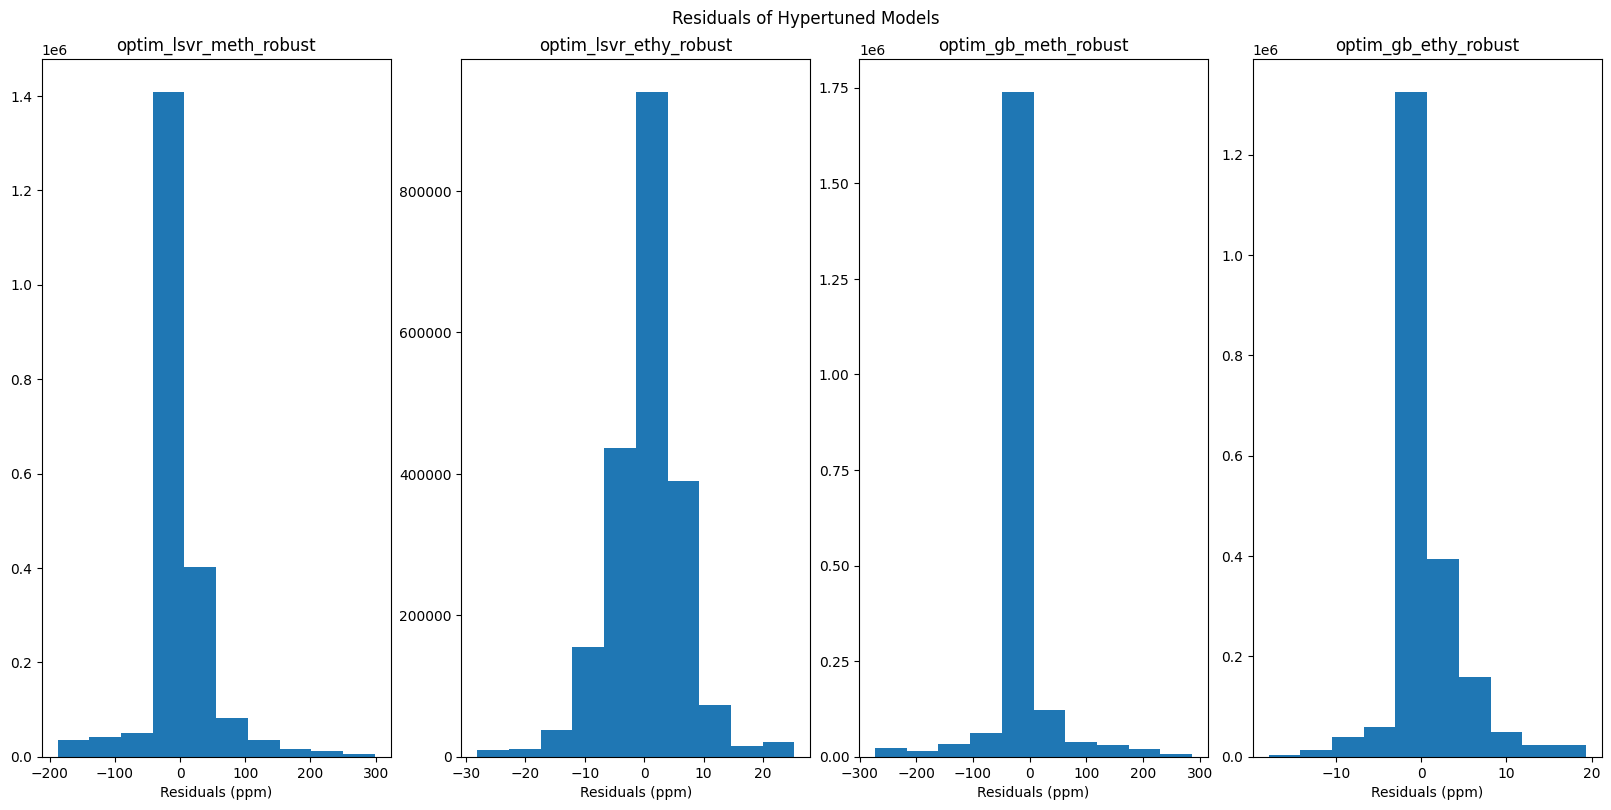

In [258]:
# Make plots of residuals values
fig = plt.figure(figsize=(16, 15), layout = "constrained")
fig.suptitle("Residuals of Hypertuned Models")
for i in range(len(model_collections)):
  curr_best_model_label = list(best_model_labels)[i]
  curr_best_model = model_collections[curr_best_model_label][0]
  curr_x_test = x_test_sets[i]
  curr_y_test = y_test_sets[i]
  ax1 = fig.add_subplot(len(model_collections)//4 + 1, 4, i + 1)
  ax1.set_xlabel("Residuals (ppm)")
  ax1.title.set_text(curr_best_model_label)
  # Plot the predicted y values vs the actual y values
  print(residuals[i].shape, residuals[i])
  ax1.hist(residuals[i])
  # Make sure that the axes are the same
  # ax1.set_aspect('equal', adjustable='box')
plt.show()

# Test a 2nd order polynomial features fit 
This will allow us to test any interactions with the dataset as well as higher order terms.

In [146]:
from sklearn.preprocessing import PolynomialFeatures as pf

In [157]:
# Create the polynomial features
poly_2=pf(2)

In [158]:
# Train the polynomial features on the scaled data
poly_2f = poly_2.fit(pd.DataFrame(data = X_train_robust, columns = x_col_names))

In [159]:
# Fit the train data on transformed polynomial features
x_train_polyrob_2 = poly_2f.transform(X_train_robust) 

c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [160]:
# Fit the test data on transformed polynomial features
x_test_polyrob_2 = poly_2f.transform(X_test_robust) 

c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [174]:
# See the new features created.
poly_2f_x_col_names = list(poly_2f.get_feature_names_out())
print(poly_2f_x_col_names)

['1', 'Time', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', 'Time^2', 'Time 1', 'Time 2', 'Time 3', 'Time 4', 'Time 5', 'Time 6', 'Time 7', 'Time 8', 'Time 9', 'Time 10', 'Time 11', 'Time 12', 'Time 13', 'Time 14', 'Time 15', 'Time 16', '1^2', '1 2', '1 3', '1 4', '1 5', '1 6', '1 7', '1 8', '1 9', '1 10', '1 11', '1 12', '1 13', '1 14', '1 15', '1 16', '2^2', '2 3', '2 4', '2 5', '2 6', '2 7', '2 8', '2 9', '2 10', '2 11', '2 12', '2 13', '2 14', '2 15', '2 16', '3^2', '3 4', '3 5', '3 6', '3 7', '3 8', '3 9', '3 10', '3 11', '3 12', '3 13', '3 14', '3 15', '3 16', '4^2', '4 5', '4 6', '4 7', '4 8', '4 9', '4 10', '4 11', '4 12', '4 13', '4 14', '4 15', '4 16', '5^2', '5 6', '5 7', '5 8', '5 9', '5 10', '5 11', '5 12', '5 13', '5 14', '5 15', '5 16', '6^2', '6 7', '6 8', '6 9', '6 10', '6 11', '6 12', '6 13', '6 14', '6 15', '6 16', '7^2', '7 8', '7 9', '7 10', '7 11', '7 12', '7 13', '7 14', '7 15', '7 16', '8^2', '8 9', '8 10', '8 11', '8 12'

# Create Dataframes of scaled polynomial data

In [175]:
# Get the CO and H columns
meth_poly_2f_col_names = poly_2f_x_col_names + ["Methane"]
ethy_poly_2f_col_names = poly_2f_x_col_names + ["Ethylene"]
print(meth_poly_2f_col_names, ethy_poly_2f_col_names)

['1', 'Time', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', 'Time^2', 'Time 1', 'Time 2', 'Time 3', 'Time 4', 'Time 5', 'Time 6', 'Time 7', 'Time 8', 'Time 9', 'Time 10', 'Time 11', 'Time 12', 'Time 13', 'Time 14', 'Time 15', 'Time 16', '1^2', '1 2', '1 3', '1 4', '1 5', '1 6', '1 7', '1 8', '1 9', '1 10', '1 11', '1 12', '1 13', '1 14', '1 15', '1 16', '2^2', '2 3', '2 4', '2 5', '2 6', '2 7', '2 8', '2 9', '2 10', '2 11', '2 12', '2 13', '2 14', '2 15', '2 16', '3^2', '3 4', '3 5', '3 6', '3 7', '3 8', '3 9', '3 10', '3 11', '3 12', '3 13', '3 14', '3 15', '3 16', '4^2', '4 5', '4 6', '4 7', '4 8', '4 9', '4 10', '4 11', '4 12', '4 13', '4 14', '4 15', '4 16', '5^2', '5 6', '5 7', '5 8', '5 9', '5 10', '5 11', '5 12', '5 13', '5 14', '5 15', '5 16', '6^2', '6 7', '6 8', '6 9', '6 10', '6 11', '6 12', '6 13', '6 14', '6 15', '6 16', '7^2', '7 8', '7 9', '7 10', '7 11', '7 12', '7 13', '7 14', '7 15', '7 16', '8^2', '8 9', '8 10', '8 11', '8 12'

In [207]:
poly_2f_total_col_names = poly_2f_x_col_names + ["Methane"] + ["Ethylene"]

In [177]:
# Make scaled polynomial train and test data dataframes

meth_train_polyrob_2_df = pd.DataFrame(data = np.concatenate([x_train_polyrob_2, y_meth_train.values.reshape(-1, 1)], axis = 1), columns = meth_poly_2f_col_names)
meth_test_polyrob_2_df = pd.DataFrame(data = np.concatenate([x_test_polyrob_2, y_meth_test.values.reshape(-1, 1)], axis = 1), columns = meth_poly_2f_col_names)
ethy_train_polyrob_2_df = pd.DataFrame(data = np.concatenate([x_train_polyrob_2, y_ethy_train.values.reshape(-1, 1)], axis = 1), columns = ethy_poly_2f_col_names)
ethy_test_polyrob_2_df = pd.DataFrame(data = np.concatenate([x_test_polyrob_2, y_ethy_test.values.reshape(-1, 1)], axis = 1), columns = ethy_poly_2f_col_names)

In [185]:
x_train_polyrob_2.shape

(2089252, 171)

In [186]:
np_x_train_polyrob_2 = np.concatenate([x_train_polyrob_2, y_meth_train.values.reshape(-1, 1), y_ethy_train.values.reshape(-1, 1)], axis = 1)
np_x_test_polyrob_2 = np.concatenate([x_test_polyrob_2, y_meth_test.values.reshape(-1, 1), y_ethy_test.values.reshape(-1, 1)], axis = 1)

MemoryError: Unable to allocate 2.69 GiB for an array with shape (2089252, 173) and data type float64

In [187]:
# Make scaled polynomial train and test dataframes
train_polyrob_2_df = pd.DataFrame(data = np_x_train_polyrob_2, columns = poly_2f_total_col_names)
# test_robust_df = pd.DataFrame(data = np_x_test_polyrob_2), columns = poly_2f_total_col_names)

In [196]:
train_polyrob_2_df

,1,Time,1,2,3,4,5,6,7,8,...,13 15,13 16,14^2,14 15,14 16,15^2,15 16,16^2,Methane,Ethylene
0,1.0,-0.999673,-7.391118,3.340090,-1.391543,-1.388796,-1.041451,-1.079500,-1.446245,-1.379641,...,1.283282,1.334836,1.991447,1.362231,1.416957,0.931822,0.969257,1.008195,0.0,0.0
1,1.0,-0.999672,-7.404867,3.342611,-1.387445,-1.383830,-1.051432,-1.079192,-1.444499,-1.381712,...,1.290976,1.330772,1.984460,1.357925,1.399784,0.929200,0.957843,0.987370,0.0,0.0
2,1.0,-0.999671,-7.373414,3.215839,-1.378997,-1.386032,-1.046951,-1.080914,-1.446659,-1.380428,...,1.291422,1.316835,1.991948,1.364864,1.391722,0.935192,0.953595,0.972360,0.0,0.0
3,1.0,-0.999670,-7.416608,3.193467,-1.389071,-1.390071,-1.049501,-1.077592,-1.437853,-1.378493,...,1.290082,1.334913,1.981477,1.362093,1.409426,0.936320,0.968858,1.002526,0.0,0.0
4,1.0,-0.999669,-7.376882,3.482197,-1.391079,-1.388369,-1.043155,-1.079317,-1.445745,-1.379782,...,1.324295,1.365849,1.991948,1.394262,1.438012,0.975913,1.006535,1.038119,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089247,1.0,0.999983,0.541779,0.129923,0.074788,0.029743,-0.572199,-0.607598,0.253058,0.165418,...,-0.400964,-0.299015,0.316607,-0.384706,-0.286891,0.467453,0.348599,0.259964,0.0,10.0
2089248,1.0,0.999984,0.541779,0.179603,0.075452,0.027005,-0.571918,-0.607754,0.251587,0.163198,...,-0.407749,-0.299114,0.309911,-0.388422,-0.284936,0.486822,0.357120,0.261974,0.0,10.0
2089249,1.0,0.999985,0.520669,0.132339,0.074788,0.031240,-0.570981,-0.606819,0.254829,0.160326,...,-0.407408,-0.301362,0.320502,-0.392938,-0.290658,0.481745,0.356349,0.263594,0.0,10.0
2089250,1.0,0.999986,0.544913,0.092112,0.075319,0.030117,-0.571918,-0.606199,0.253502,0.159152,...,-0.402706,-0.300149,0.308872,-0.382098,-0.284789,0.472684,0.352306,0.262585,0.0,10.0


# Get Correlation Data Frame of Polynomial fitted data

In [188]:
#make a correlated data frame of train data only:
#finding pairwise correlation of all columns in the dataframe.
#Any na values are automatically excluded. For any non-numeric data type columns
#in the dataframe it is ignored.
train_polyrob_2_df_corr = train_polyrob_2_df.corr()

In [192]:
train_polyrob_2_df_corr = train_robust_df_corr

In [193]:
print(train_polyrob_2_df_corr)

           1      Time         1         2         3         4         5  \
1        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
Time     NaN  1.000000  0.219619 -0.308859 -0.013383 -0.013228  0.009415   
1        NaN  0.219619  1.000000 -0.198783  0.537539  0.513057  0.015710   
2        NaN -0.308859 -0.198783  1.000000 -0.068226 -0.067512 -0.037942   
3        NaN -0.013383  0.537539 -0.068226  1.000000  0.998984  0.742130   
...       ..       ...       ...       ...       ...       ...       ...   
15^2     NaN  0.090950  0.516276 -0.028206  0.261637  0.231039 -0.241746   
15 16    NaN  0.113153  0.427753 -0.017989  0.136409  0.107520 -0.306640   
16^2     NaN  0.134219  0.312693 -0.004949 -0.025709 -0.052242 -0.390503   
Methane  NaN  0.024801 -0.111764 -0.013512  0.423433  0.448445  0.756513   
Ethylene NaN -0.035081  0.498666 -0.059094  0.401418  0.374839 -0.044836   

                 6         7         8  ...     13 15     13 16      14^2  \
1         

# Remove Collinear Variables From Scaled Polynomial Data

In [205]:
# Rename the bias column to not be confused with sensor 1
polyrob_2_col_name_list = list(train_polyrob_2_df_corr.columns)
polyrob_2_col_name_list[0] = "Bias"
train_polyrob_2_df_corr.columns = polyrob_2_col_name_list
train_polyrob_2_df_corr

,Bias,Time,1,2,3,4,5,6,7,8,...,13 15,13 16,14^2,14 15,14 16,15^2,15 16,16^2,Methane,Ethylene
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,NaN,1.000000,0.219619,-0.308859,-0.013383,-0.013228,0.009415,0.017511,-0.025746,-0.020037,...,0.113007,0.122305,0.159809,0.112262,0.122468,0.090950,0.113153,0.134219,0.024801,-0.035081
1,NaN,0.219619,1.000000,-0.198783,0.537539,0.513057,0.015710,-0.024867,0.601787,0.544708,...,-0.402581,-0.417106,-0.240050,-0.383683,-0.402675,0.516276,0.427753,0.312693,-0.111764,0.498666
2,NaN,-0.308859,-0.198783,1.000000,-0.068226,-0.067512,-0.037942,-0.034706,-0.070586,-0.069749,...,0.034369,0.042711,0.053983,0.033825,0.042402,-0.028206,-0.017989,-0.004949,-0.013512,-0.059094
3,NaN,-0.013383,0.537539,-0.068226,1.000000,0.998984,0.742130,0.704836,0.982643,0.989306,...,-0.450243,-0.541868,-0.323616,-0.426349,-0.520323,0.261637,0.136409,-0.025709,0.423433,0.401418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15^2,NaN,0.090950,0.516276,-0.028206,0.261637,0.231039,-0.241746,-0.272103,0.346582,0.283789,...,-0.232204,-0.209470,-0.011535,-0.206183,-0.187071,1.000000,0.986129,0.934797,-0.249688,0.543546
15 16,NaN,0.113153,0.427753,-0.017989,0.136409,0.107520,-0.306640,-0.330824,0.213402,0.153609,...,-0.091025,-0.060593,0.074313,-0.066384,-0.039102,0.986129,1.000000,0.980617,-0.272967,0.474348
16^2,NaN,0.134219,0.312693,-0.004949,-0.025709,-0.052242,-0.390503,-0.406495,0.041475,-0.014405,...,0.072090,0.114403,0.184253,0.093873,0.133691,0.934797,0.980617,1.000000,-0.303396,0.378019
Methane,NaN,0.024801,-0.111764,-0.013512,0.423433,0.448445,0.756513,0.776944,0.368892,0.438217,...,0.094204,0.020127,0.042360,0.102680,0.031141,-0.249688,-0.272967,-0.303396,1.000000,-0.161713


In [218]:
np.isnan(train_polyrob_2_df_corr.iloc[1,1])

False

In [221]:
train_polyrob_2_df_corr.shape[0]

173

In [224]:
def get_non_collinear_cols(corr_df, cutoff):
    '''Gets all columns that aren't correlated with other columns (aka R^2 < cutoff)'''
    drop_cols = []
    keep_cols = []
    # Let i be row, j be col
    for i in range(corr_df.shape[0]):
        # If we already decided to drop this feature, then no need to compare other columns with it
        if corr_df.columns[i] in drop_cols:
            continue
        keep_cols.append(corr_df.columns[i])
        for j in range(i + 1, corr_df.shape[0]):
            # If we already decided to drop feature in row j, then no need to compare other columns with it
            if corr_df.columns[j] in drop_cols:
                continue
            # Check the correlation
            if not np.isnan(corr_df.iloc[i, j]) and corr_df.iloc[i, j] > cutoff:
                # Drop the jth feature if we found a correlation greater than the cutoff.
                drop_cols.append(corr_df.columns[j])
    return keep_cols, drop_cols     

In [262]:
pr2_keep_cols, pr2_drop_cols = get_non_collinear_cols(train_polyrob_2_df_corr, 0.95)
print(pr2_keep_cols, pr2_drop_cols)

['Bias', 'Time', '1', '2', '3', '5', '11', 'Time^2', 'Time 1', 'Time 2', 'Time 3', 'Time 5', 'Time 9', 'Time 11', '1^2', '1 2', '1 3', '1 5', '1 9', '1 11', '1 13', '2^2', '2 3', '2 5', '2 9', '3^2', '3 5', '3 9', '3 11', '5^2', '5 9', '5 11', '7 12', '9 16', '11^2', '16^2', 'Methane', 'Ethylene'] ['9', '10', '4', '7', '8', '12', '6', '13', '14', '15', '16', 'Time 4', 'Time 7', 'Time 8', 'Time 12', 'Time 6', 'Time 13', 'Time 14', 'Time 10', 'Time 15', 'Time 16', '1 4', '1 7', '1 8', '1 6', '1 10', '9^2', '9 10', '10^2', '1 12', '1 15', '1 16', '9 11', '9 15', '10 11', '10 15', '1 14', '2 4', '2 7', '2 8', '2 11', '2 12', '2 15', '2 16', '2 6', '2 13', '2 14', '2 10', '3 4', '3 7', '3 8', '3 12', '4^2', '4 7', '4 8', '4 12', '7^2', '7 8', '8^2', '8 12', '3 6', '3 13', '3 14', '4 5', '4 6', '4 13', '4 14', '5 7', '5 8', '5 12', '6 7', '6 8', '6 12', '7 13', '7 14', '8 13', '8 14', '12 13', '12 14', '3 10', '4 9', '4 10', '7 9', '7 10', '8 9', '8 10', '9 12', '10 12', '3 15', '3 16', '4 1

In [268]:
# Drop column 2 because sensor 2 is drifting / broken
pr2_sensor_2_cols = []
pr2_time_cols = []
y_cols = []
pr2_keep_cols, pr2_drop_cols = get_non_collinear_cols(train_polyrob_2_df_corr, 0.95)
i = 0
while i < len(pr2_keep_cols):
    curr_col = pr2_keep_cols[i]
    if "2" in curr_col and ("2^2" in curr_col or not "^2" in curr_col):
        pr2_sensor_2_cols.append(pr2_keep_cols.pop(i))
    elif "Time" in curr_col:
        # Drop time
        pr2_time_cols.append(pr2_keep_cols.pop(i))
    elif 'Methane' in curr_col or 'Ethylene' in curr_col:
        # We don't keep the response data
        y_cols.append(pr2_keep_cols.pop(i))
    else: 
        i += 1
pr2_drop_cols += pr2_sensor_2_cols + pr2_time_cols
print(pr2_keep_cols, pr2_drop_cols)


['Bias', '1', '3', '5', '11', '1^2', '1 3', '1 5', '1 9', '1 11', '1 13', '3^2', '3 5', '3 9', '3 11', '5^2', '5 9', '5 11', '9 16', '11^2', '16^2'] ['9', '10', '4', '7', '8', '12', '6', '13', '14', '15', '16', 'Time 4', 'Time 7', 'Time 8', 'Time 12', 'Time 6', 'Time 13', 'Time 14', 'Time 10', 'Time 15', 'Time 16', '1 4', '1 7', '1 8', '1 6', '1 10', '9^2', '9 10', '10^2', '1 12', '1 15', '1 16', '9 11', '9 15', '10 11', '10 15', '1 14', '2 4', '2 7', '2 8', '2 11', '2 12', '2 15', '2 16', '2 6', '2 13', '2 14', '2 10', '3 4', '3 7', '3 8', '3 12', '4^2', '4 7', '4 8', '4 12', '7^2', '7 8', '8^2', '8 12', '3 6', '3 13', '3 14', '4 5', '4 6', '4 13', '4 14', '5 7', '5 8', '5 12', '6 7', '6 8', '6 12', '7 13', '7 14', '8 13', '8 14', '12 13', '12 14', '3 10', '4 9', '4 10', '7 9', '7 10', '8 9', '8 10', '9 12', '10 12', '3 15', '3 16', '4 11', '4 15', '4 16', '7 11', '7 15', '7 16', '8 11', '8 15', '8 16', '11 12', '12 15', '12 16', '5 6', '5 13', '5 14', '6^2', '6 13', '6 14', '13^2', '

In [ ]:
x_pr2_keep_cols = pr2_keep_cols.drop([['Methane','Ethylene']])

In [274]:
# Store all the indices mapping pr2_keep_cols to train_polyrob_2_df_corr.columns
indices = [pr2_keep_cols.index(col) for col in pr2_keep_cols]



In [280]:
x_train_polyrob_2[:,indices].shape

(2089252, 21)

In [281]:
# We need to remove collinear variables
x_train_pr2_reduced = pd.DataFrame(x_train_polyrob_2[:,indices], columns = pr2_keep_cols)
x_test_pr2_reduced = pd.DataFrame(x_test_polyrob_2[:,indices], columns = pr2_keep_cols)

In [283]:
# Get values
x_train_pr2_reduced_vals = x_train_pr2_reduced.values
x_test_pr2_reduced_vals = x_test_pr2_reduced.values

# Run Isolation Forest on Scaled Polynomial Data

# Run MLP Regressor

In [83]:
mlpr_param_grid = {
    'activation': ['relu'],
    'hidden_layer_sizes': [(50, 50), (50)],
    'alpha': [0.1, 0.01, 0.001],
    'batch_size': [200, 400, 600],
    'learning_rate': ['adaptive'],
    'max_iter': [100],
    'early_stopping': [True],
    'n_iter_no_change': [40]
}

In [84]:
optim_mlpr_meth_robust = optimize_halving_model(MLPRegressor(), mlpr_param_grid, "neg_root_mean_squared_error", True, 5, 10, -1,x_train_robust_preprocessed, y_meth_train_robust_preprocessed, x_test_robust_reduced_vals, y_meth_test_vals)
print(optim_mlpr_meth_robust[2:])
model_collections["optim_mlpr_meth_robust"] = optim_mlpr_meth_robust
optim_mlpr_ethy_robust = optimize_halving_model(MLPRegressor(), mlpr_param_grid, "neg_root_mean_squared_error", True, 5, 10, -1, x_train_robust_preprocessed, y_ethy_train_robust_preprocessed, x_test_robust_reduced_vals, y_ethy_test_vals)
print(optim_mlpr_ethy_robust[2:])
model_collections["optim_mlpr_ethy_robust"] = optim_mlpr_ethy_robust

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 77302
max_resources_: 2087163
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 27
n_resources: 77302
Fitting 5 folds for each of 27 candidates, totalling 135 fits


KeyboardInterrupt: 

<br>
<br>


**LDA 50/50**

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(solver='svd')

ytest_pred_lda = lda.fit(x_train_1.values, y_train_1.values).predict(x_test_1.values)
ytest_pred_lda2 = lda.fit(x_train_2.values, y_train_2.values).predict(x_test_2.values)

<br>

Methane LDA model Stats

In [11]:
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report, precision_score

scor1 = sm.accuracy_score(y_test_1, ytest_pred_lda)
print("Methane Accuracy = {}".format(scor1))

print("\n")
print("Methane LDA model Classification Report")
print(classification_report(y_test_1, ytest_pred_lda, target_names=['Methane', 'No Methane']))

print("\n")
print("LDA Methane Confusion Matrix")
df3=pd.DataFrame({'True': y_test_1,
                    'Predicted': ytest_pred_lda})
df3.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)
df3.groupby(['Predicted','True']).size().unstack('True')

Methane Accuracy = 0.9330525948999929


Methane LDA model Classification Report
              precision    recall  f1-score   support

     Methane       0.95      0.93      0.94   1165323
  No Methane       0.91      0.94      0.93    923929

   micro avg       0.93      0.93      0.93   2089252
   macro avg       0.93      0.93      0.93   2089252
weighted avg       0.93      0.93      0.93   2089252



LDA Methane Confusion Matrix


True,No,Yes
Predicted,,
No,1084780,59327
Yes,80543,864602


<br>

Ethylene Model Stats

In [115]:
scor2 = sm.accuracy_score(y_test_2, ytest_pred_lda2)
print("Ethylene Accuracy = {}".format(scor2))

print("\n")
print("Ethylene LDA model Classification Report")
print(classification_report(y_test_2, ytest_pred_lda2, target_names=['Ethylene', 'No Ethylene']))

print("\n")
print("LDA Ethylene Confusion Matrix")
df4=pd.DataFrame({'True': y_test_2,
                    'Predicted': ytest_pred_lda2})
df4.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)
df4.groupby(['Predicted','True']).size().unstack('True')



Ethylene Accuracy = 0.9049099869235496


Ethylene LDA model Classification Report
              precision    recall  f1-score   support

    Ethylene       0.90      0.94      0.92   1188213
 No Ethylene       0.91      0.86      0.89    901039

   micro avg       0.90      0.90      0.90   2089252
   macro avg       0.91      0.90      0.90   2089252
weighted avg       0.91      0.90      0.90   2089252



LDA Ethylene Confusion Matrix


True,No,Yes
Predicted,,
No,1114662,125116
Yes,73551,775923


<br>
<br>
<br>
<br>

**QDA 50/50**

In [116]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

y_pred_qda1 = qda.fit(x_train_1.values, y_train_1.values).predict(x_test_1.values)
y_pred_qda2 = qda.fit(x_train_2.values, y_train_2.values).predict(x_test_2.values)

<br>

Methane QDA Model Stats

In [117]:
qda_scor1 = sm.accuracy_score(y_test_1, y_pred_qda1)
print("Methane QDA model Accuracy = {}".format(qda_scor1))

print("\n")
print("Methane QDA model Classification Report")
print(classification_report(y_test_1, y_pred_qda1, target_names=['Methane', 'No Methane']))

print("\n")
print("QDA Methane Confusion Matrix")
df3=pd.DataFrame({'True': y_test_1,
                    'Predicted': y_pred_qda1})
df3.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)
df3.groupby(['Predicted','True']).size().unstack('True')

Methane QDA model Accuracy = 0.9222793612259316


Methane QDA model Classification Report
              precision    recall  f1-score   support

     Methane       0.95      0.91      0.93   1165323
  No Methane       0.89      0.94      0.91    923929

   micro avg       0.92      0.92      0.92   2089252
   macro avg       0.92      0.92      0.92   2089252
weighted avg       0.92      0.92      0.92   2089252



QDA Methane Confusion Matrix


True,No,Yes
Predicted,,
No,1062477,59532
Yes,102846,864397


<br>

Ethylene QDA Model Stats

In [118]:
qda_scor2 = sm.accuracy_score(y_test_2, y_pred_qda2)
print("Ethylene QDA model Accuracy = {}".format(qda_scor2))

print("\n")
print("Ethylene QDA model Classification Report")
print(classification_report(y_test_2, y_pred_qda2, target_names=['Ethylene', 'No Ethylene']))

print("\n")
print("QDA Ethylene Confusion Matrix")
df4=pd.DataFrame({'True': y_test_2,
                    'Predicted': y_pred_qda2})
df4.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)
df4.groupby(['Predicted','True']).size().unstack('True')

Ethylene QDA model Accuracy = 0.8740788569306144


Ethylene QDA model Classification Report
              precision    recall  f1-score   support

    Ethylene       0.90      0.88      0.89   1188213
 No Ethylene       0.84      0.87      0.86    901039

   micro avg       0.87      0.87      0.87   2089252
   macro avg       0.87      0.87      0.87   2089252
weighted avg       0.88      0.87      0.87   2089252



QDA Ethylene Confusion Matrix


True,No,Yes
Predicted,,
No,1039990,114858
Yes,148223,786181


<br>
<br>
<br>
<br>


**Logistic Regression 50/50**

In [27]:
import sklearn.linear_model as sk_lm
lr = sk_lm.LogisticRegression(solver='newton-cg', multi_class='ovr', n_jobs=1) 

#Methane Fit
y_pred_lr1 = lr.fit(x_train_1.values, y_train_1.values).predict(x_test_1.values)  

/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [28]:
#Ethylene Fit
y_pred_lr2 = lr.fit(x_train_2.values, y_train_2.values).predict(x_test_2.values) 

/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


<br>
Methane Logistic Regression Model Stats

In [35]:
lr_scor1 = sm.accuracy_score(y_test_1, y_pred_lr1)
print("Methane Logistic Regression model Accuracy = {}".format(lr_scor1))

print("\n")
print("Methane Logistic Regression model Classification Report")
print(classification_report(y_test_1, y_pred_lr1, target_names=['Methane', 'No Methane']))

print("\n")
print("Logistic Regression Methane Confusion Matrix")
df3=pd.DataFrame({'True': y_test_1,
                    'Predicted': y_pred_lr1})
df3.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)
df3.groupby(['Predicted','True']).size().unstack('True')

Methane Logistic Regression model Accuracy = 0.9403087803673277


Methane Logistic Regression model Classification Report
              precision    recall  f1-score   support

     Methane       0.95      0.94      0.95   1165323
  No Methane       0.93      0.94      0.93    923929

   micro avg       0.94      0.94      0.94   2089252
   macro avg       0.94      0.94      0.94   2089252
weighted avg       0.94      0.94      0.94   2089252



Logistic Regression Methane Confusion Matrix


True,No,Yes
Predicted,,
No,1099987,59374
Yes,65336,864555


<br>
Ethylene Logistic Regression Model Stats

In [36]:
lr_scor2 = sm.accuracy_score(y_test_2, y_pred_lr2)
print("Ethylene Logistic Regression model Accuracy = {}".format(lr_scor2))

print("\n")
print("Ethylene Logistic Regression model Classification Report")
print(classification_report(y_test_2, y_pred_lr2, target_names=['Ethylene', 'No Ethylene']))

print("\n")
print("Logistic Regression Ethylene Confusion Matrix")
df4=pd.DataFrame({'True': y_test_2,
                    'Predicted': y_pred_lr2})
df4.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)
df4.groupby(['Predicted','True']).size().unstack('True')

Ethylene Logistic Regression model Accuracy = 0.9130837256587525


Ethylene Logistic Regression model Classification Report
              precision    recall  f1-score   support

    Ethylene       0.91      0.94      0.93   1188213
 No Ethylene       0.92      0.87      0.90    901039

   micro avg       0.91      0.91      0.91   2089252
   macro avg       0.91      0.91      0.91   2089252
weighted avg       0.91      0.91      0.91   2089252



Logistic Regression Ethylene Confusion Matrix


True,No,Yes
Predicted,,
No,1121377,114754
Yes,66836,786285


<br>
<br>
<br>
<br>

**Preprocessing**

We see that sensor2 is not functioning properly so we will eliminate it. We will also eliminate the first chunk of time where the sensor is actualizing as seen in the plot above. We will eliminate the first 200 seconds

In [5]:
df2 = df.drop(columns='2')
df3 = df2[20000:]

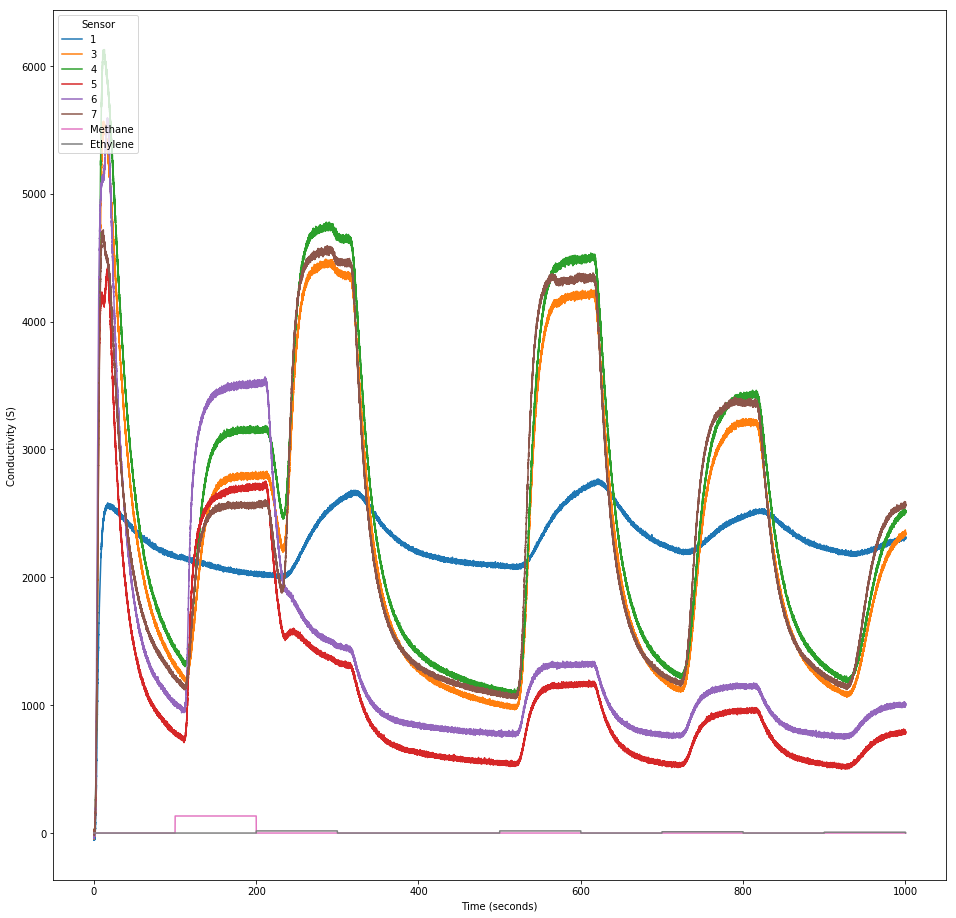

In [30]:
plt.figure(figsize=(16,16))
a = np.arange(100000)
plt.plot(df2['Time'][a], df['1'][a])
plt.plot(df2['Time'][a], df['3'][a])
plt.plot(df2['Time'][a], df['4'][a])
plt.plot(df2['Time'][a], df['5'][a])
plt.plot(df2['Time'][a], df['6'][a])
plt.plot(df2['Time'][a], df['7'][a])
plt.plot(df2['Time'][a], df['Methane'][a])
plt.plot(df2['Time'][a], df['Ethylene'][a])

plt.xlabel('Time (seconds)')
plt.ylabel('Conductivity (S)')
# plt.axis(xmin=0, xmax=1000)
plt.legend(loc='upper left', title ="Sensor")


In [6]:
from sklearn.preprocessing import StandardScaler

x2 = StandardScaler().fit(df3[['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']].values)
x2 = x2.transform(df3[['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']].values)
ym2 = df3['Methane Bin'].values.reshape(-1,1)
ye2 = df3['Ethylene Bin'].values.reshape(-1,1)
y2 = np.concatenate((ym2, ye2), axis=1)
x2_train, x2_test, ym2_train, ym2_test, ye2_train, ye2_test= train_test_split(x2, ym2, ye2, test_size=0.50, random_state=42)


In [67]:
ymtest_pred_lda = lda.fit(x2_train, ym2_train).predict(x2_test)
yetest_pred_lda = lda.fit(x2_train, ye2_train).predict(x2_test)

print("Ethylene LDA Accuracy = {}".format(sm.accuracy_score(ym2_test, ymtest_pred_lda)))
print("Methane LDA Accuracy = {}".format(sm.accuracy_score(ye2_test, yetest_pred_lda)))


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Ethylene LDA Accuracy = 0.9390203784822619
Methane LDA Accuracy = 0.9044925771383171


In [57]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

ymtest_pred_qda = qda.fit(x2_train, ym2_train).predict(x2_test)
yetest_pred_qda = qda.fit(x2_train, ye2_train).predict(x2_test)

print("Ethylene QDA Accuracy = {}".format(sm.accuracy_score(ym2_test, ymtest_pred_qda)))
print("Methane QDA Accuracy = {}".format(sm.accuracy_score(ye2_test, yetest_pred_qda)))


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Ethylene QDA Accuracy = 0.9295770786802177
Methane QDA Accuracy = 0.8857002422024843


In [58]:
import sklearn.linear_model as sk_lm
lr = sk_lm.LogisticRegression(solver='newton-cg', multi_class='ovr', n_jobs=1) 


ymtest_pred_lr = lr.fit(x2_train, ym2_train).predict(x2_test)
yetest_pred_lr = lr.fit(x2_train, ye2_train).predict(x2_test)

print("Ethylene Logistic Regression Accuracy = {}".format(sm.accuracy_score(ym2_test, ymtest_pred_lr)))
print("Methane Logistic Regression Accuracy = {}".format(sm.accuracy_score(ye2_test, yetest_pred_lr)))


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:422: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The l

Ethylene Logistic Regression Accuracy = 0.9436306902674616
Methane Logistic Regression Accuracy = 0.9125526872163644


<br>
<br>
<br>

Cross validation analysis

In [79]:
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import KFold

kf2 = KFold(n_splits = 2)
kf5 = KFold(n_splits = 5)
k2_acc = cvs(lda, x2, ym2, cv = kf2, scoring = "accuracy")
k5_acc = cvs(lda, x2, ym2, cv = kf5, scoring = "accuracy")

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [80]:
print("Model accuracy running cross validation with two k-folds:", k2_acc)
print("Model accuracy running cross validation with five k-folds:", k5_acc)

Model accuracy running cross validation with two k-folds: [0.94563814 0.93257768]
Model accuracy running cross validation with five k-folds: [0.94564393 0.9347061  0.92965741 0.94249977 0.94102681]


Given similar results of the cross validations, we will use half the data for training for model development.

<br>
<br>
<br>

## PCA
<br>
Methane

In [14]:
sc =  StandardScaler()
sc.fit(df3[['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']])
a = sc.transform(df3[['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']])

In [15]:
ind=df3.index
ind

RangeIndex(start=20000, stop=4178504, step=1)

In [16]:
dft = pd.DataFrame(a,index=ind,columns=['1s','3s','4s','5s','6s','7s','8s','9s','10s','11s','12s','13s','14s','15s','16s'])


In [17]:
df4 = pd.concat([df3,dft],axis=1)

In [18]:
x = df4[['1s','3s','4s','5s','6s','7s','8s','9s','10s','11s','12s','13s','14s','15s','16s']]
y_meth = df4['Methane Bin']
y_ethy = df4['Ethylene Bin']


x_train, x_test, y_train, y_test = train_test_split(x, y_meth, test_size=0.50, random_state=42)

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x, y_ethy, test_size=0.50, random_state=42)

In [12]:
pca = PCA()
pca.fit(x_train)
print(pca.explained_variance_ratio_)

[7.10582032e-01 2.48628804e-01 3.54876889e-02 2.37563934e-03
 2.22931088e-03 3.16522677e-04 1.85311710e-04 6.85625441e-05
 4.67111025e-05 2.57876637e-05 2.04403337e-05 1.28335337e-05
 1.07528499e-05 5.52821673e-06 4.07449337e-06]


In [13]:
a=np.cumsum(pca.explained_variance_ratio_)

In [14]:
a

array([0.71058203, 0.95921084, 0.99469852, 0.99707416, 0.99930347,
       0.99962   , 0.99980531, 0.99987387, 0.99992058, 0.99994637,
       0.99996681, 0.99997964, 0.9999904 , 0.99999593, 1.        ])

In [15]:
x_train_pca = pca.transform(x_train)
x_train_pca.shape

(2079252, 15)

In [16]:
x_test_pca = pca.transform(x_test)
x_test_pca.shape
y_train.shape

(2079252,)

In [17]:
mse = []
for i in range(1,16,1):
    pred = lr.fit(x_train_pca[:,:i], y_train.values.reshape(-1,1)).predict(x_test_pca[:,:i])
    mse.append(sm.accuracy_score(y_test, pred))

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

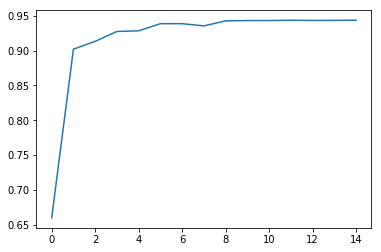

In [18]:
plt.plot(mse)

In [19]:
mse

[0.6598791296100713,
 0.902146541159994,
 0.9133539368965378,
 0.9275335553362459,
 0.9284988063014968,
 0.9387096898307661,
 0.9387457604946394,
 0.9355474949645354,
 0.9427606658548363,
 0.9432387223867045,
 0.9432569981897336,
 0.9436330949783864,
 0.943381562215643,
 0.9434926598603729,
 0.9436619515094852]

Text(0.5, 1.0, 'PC3')

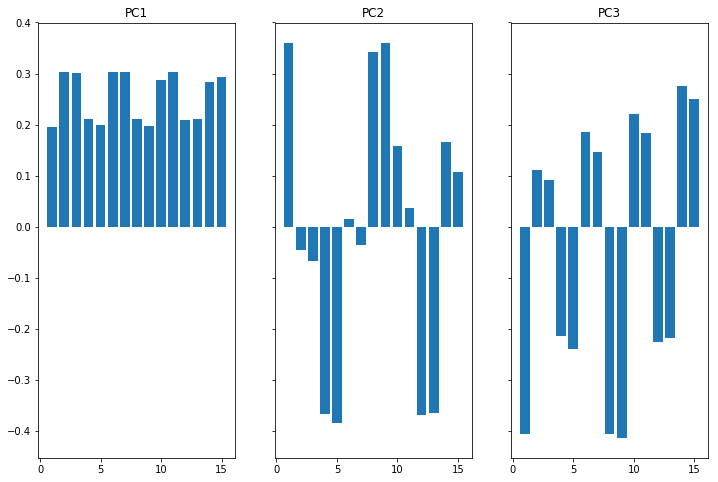

In [20]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(12,8))
ax1.bar(range(1,16,1),pca.components_[0])
ax1.set_title('PC1')
ax2.bar(range(1,16,1),pca.components_[1])
ax2.set_title('PC2')
ax3.bar(range(1,16,1),pca.components_[2])
ax3.set_title('PC3')

<br>
<br>

Ethylene

In [21]:
pca2 = PCA()
pca2.fit(x_train_2)
print(pca2.explained_variance_ratio_)
x_train_pca2 = pca2.transform(x_train_2)
x_train_pca2.shape

[7.10582032e-01 2.48628804e-01 3.54876889e-02 2.37563934e-03
 2.22931088e-03 3.16522677e-04 1.85311710e-04 6.85625441e-05
 4.67111025e-05 2.57876637e-05 2.04403337e-05 1.28335337e-05
 1.07528499e-05 5.52821673e-06 4.07449337e-06]


(2079252, 15)

In [22]:
x_test_pca2 = pca2.transform(x_test_2)
x_test_pca2.shape

(2079252, 15)

In [23]:
accur = []
for i in range(1,16,1):
    pred2 = lr.fit(x_train_pca2[:,:i], y_train_2.values.reshape(-1,1)).predict(x_test_pca2[:,:i])
    accur.append(sm.accuracy_score(y_test_2, pred2))

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 

[0.7362532295267721,
 0.8362872802334685,
 0.8693005946369176,
 0.8809244863056522,
 0.8805503132857393,
 0.8771207145646608,
 0.8891976537716448,
 0.9078774482361927,
 0.9106370944935968,
 0.9112103775780905,
 0.9115316469576559,
 0.9116446683711258,
 0.9114792242594933,
 0.9119587236179164,
 0.9124920885010571]

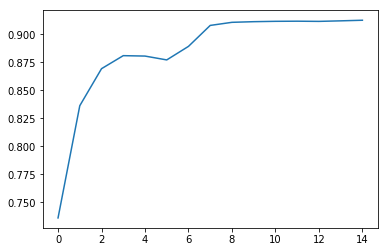

In [24]:
plt.plot(accur)
accur

In [25]:
pca2.components_.shape

(15, 15)

In [26]:
pca2.components_[0]

array([0.19523402, 0.30292301, 0.30179372, 0.21055388, 0.1985983 ,
       0.30293734, 0.30321912, 0.21029307, 0.19785115, 0.28660899,
       0.30241017, 0.20866237, 0.21184555, 0.2828343 , 0.29355776])

Text(0.5, 1.0, 'PC3')

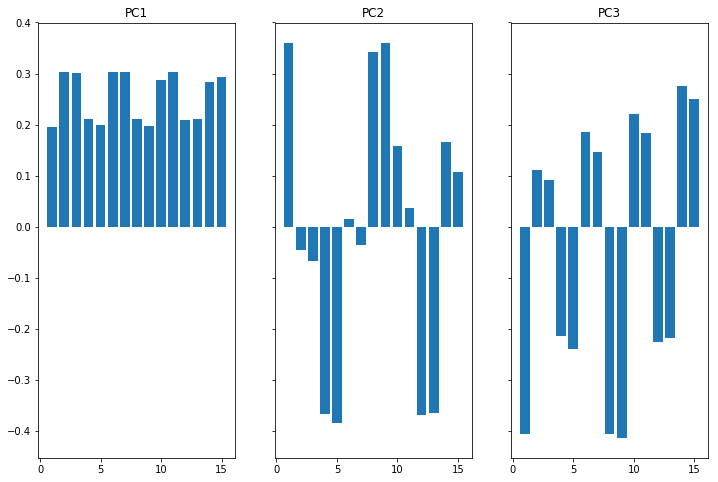

In [27]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(12,8))
ax1.bar(range(1,16,1),pca2.components_[0])
ax1.set_title('PC1')
ax2.bar(range(1,16,1),pca2.components_[1])
ax2.set_title('PC2')
ax3.bar(range(1,16,1),pca2.components_[2])
ax3.set_title('PC3')

from both of these plots it is evident that sensor TSG2600 and TSG2620 are more important

<br>
<br>
<br>
<br>
<br>

## Feature extraction

Extracting rolling or moving average

In [19]:
l = []
lda = LinearDiscriminantAnalysis(solver='svd')
for i in np.arange(3,20,1):
    x = df3[['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']].rolling(i).mean()
    x = x[20:]
    y = df3['Ethylene Bin'][20:]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=42)
    
    lda.fit(x_train, y_train.values.reshape(-1,1))
    LDA_test_pred = lda.predict(x_test)
    tn, fp, fn, tp = confusion_matrix(y_test, LDA_test_pred).ravel()
    l.append(fp+fn)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [61]:
print(l)
print(min(l))

[196873, 196735, 196628, 196546, 196536, 196518, 196542, 196547, 196580, 196583, 196584, 196626, 196621, 196608, 196601, 196640, 196675]
196518


optimal window = 8

In [63]:
m = []
lda = LinearDiscriminantAnalysis(solver='svd')
for i in np.arange(.1,1.1,.1):
    x = df3[['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']].ewm(alpha=i).mean() 
    x = x[10:]
    y = df3['Ethylene Bin'][10:]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=42)
    
    lda.fit(x_train, y_train.values.reshape(-1,1))
    LDA_test_pred = lda.predict(x_test)
    tn, fp, fn, tp = confusion_matrix(y_test, LDA_test_pred).ravel()
    m.append(fp+fn)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [64]:
print(m)
print(min(m))


[196580, 196354, 196374, 196520, 196743, 196956, 197239, 197512, 197865, 198280]
196354


optimal alpha = .3

In [7]:
#Rolling averages with window=8

win = 8
rollm = df3[['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']].rolling(win).mean()
rollm.rename({'1':'1avg','3':'3avg','4':'4avg','5':'5avg','6':'6avg','7':'7avg','8':'8avg','9':'9avg','10':'10avg','11':'11avg','12':'12avg','13':'13avg','14':'14avg','15':'15avg','16':'16avg'}, axis='columns', inplace=True)
df3 = pd.concat([df3,rollm],axis=1)

In [8]:
#Exponential weighted average with alpha = .3

ex = df3[['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']].ewm(alpha=.3).mean()
ex.rename({'1':'1ex','3':'3ex','4':'4ex','5':'5ex','6':'6ex','7':'7ex','8':'8ex','9':'9ex','10':'10ex','11':'11ex','12':'12ex','13':'13ex','14':'14ex','15':'15ex','16':'16ex'}, axis='columns', inplace=True)
df3 = pd.concat([df3,ex],axis=1)

<br>
<br>
<br>
Extracing first and second derivative terms

In [22]:
#first derivative

der = df3[['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']].diff(8)/8
der.rename({'1':'1der','3':'3der','4':'4der','5':'5der','6':'6der','7':'7der','8':'8der','9':'9der','10':'10der','11':'11der','12':'12der','13':'13der','14':'14der','15':'15der','16':'16der'}, axis='columns', inplace=True)
df3 = pd.concat([df3,der],axis=1)

In [23]:
#second derivative

der2 = df3[['1der','3der','4der','5der','6der','7der','8der','9der','10der','11der','12der','13der','14der','15der','16der']].diff(8)/8
der2.rename({'1der':'1der2','3der':'3der2','4der':'4der2','5der':'5der2','6der':'6der2','7der':'7der2','8der':'8der2','9der':'9der2','10der':'10de2r','11der':'11der2','12der':'12der2','13der':'13der2','14der':'14der2','15der':'15der2','16der':'16der2'}, axis='columns', inplace=True)
df3 = pd.concat([df3,der2],axis=1)
df3.dropna(inplace=True)

<br>
<br>
<br>
<br>

## Performance of fine-tuned features

In [11]:
x5 =df3.drop(['Time','Methane','Ethylene','Methane Bin','Ethylene Bin'],axis=1)
ym5 = df3['Methane Bin']
ye5 = df3['Ethylene Bin']

x5_train, x5_test, ym5_train, ym5_test, ye5_train, ye5_test = train_test_split(x5, ym5, ye5, test_size=0.50, random_state=42)

<br>
<br>
LDA with added features

In [14]:
ym5test_pred_lda = lda.fit(x5_train, ym5_train).predict(x5_test)
ye5test_pred_lda = lda.fit(x5_train, ye5_train).predict(x5_test)
print("Ethylene LDA Accuracy = {}".format(sm.accuracy_score(ym5_test, ym5test_pred_lda)))
print("Methane LDA Accuracy = {}".format(sm.accuracy_score(ye5_test, ye5test_pred_lda)))


Ethylene LDA Accuracy = 0.9411863157955488
Methane LDA Accuracy = 0.9060610491120811


In [40]:
print("LDA Ethylene model confusion matrix")
print(cr(ye5_test, ye5test_pred_lda))
tn, fp, fn, tp = confusion_matrix(ye5_test, ye5test_pred_lda).ravel()
ce_lda = np.array([tp,fp,fn,tn]).reshape((2,2))
pd.DataFrame(ce_lda,columns= ['True yes','True no'],index=['Pred yes','Pred no'])

LDA Ethylene model confusion matrix
              precision    recall  f1-score   support

           0       0.90      0.94      0.92   1178361
           1       0.92      0.86      0.89    900883

   micro avg       0.91      0.91      0.91   2079244
   macro avg       0.91      0.90      0.90   2079244
weighted avg       0.91      0.91      0.91   2079244



,True yes,True no
Pred yes,776086,70525
Pred no,124797,1107836


In [39]:
print("LDA Methane model confusion matrix")
print(cr(ym5_test, ym5test_pred_lda))
tn, fp, fn, tp = confusion_matrix(ym5_test, ym5test_pred_lda).ravel()
cm_lda = np.array([tp,fp,fn,tn]).reshape((2,2))
pd.DataFrame(cm_lda,columns= ['True yes','True no'],index=['Pred yes','Pred no'])

LDA Methane model confusion matrix
              precision    recall  f1-score   support

           0       0.95      0.94      0.95   1159945
           1       0.93      0.94      0.93    919299

   micro avg       0.94      0.94      0.94   2079244
   macro avg       0.94      0.94      0.94   2079244
weighted avg       0.94      0.94      0.94   2079244



,True yes,True no
Pred yes,863602,66591
Pred no,55697,1093354


<br>
<br>
QDA with added features

In [16]:
ym5test_pred_qda = qda.fit(x5_train, ym5_train).predict(x5_test)
ye5test_pred_qda = qda.fit(x5_train, ye5_train).predict(x5_test)

print("Ethylene QDA Accuracy = {}".format(sm.accuracy_score(ym5_test, ym5test_pred_qda)))
print("Methane QDA Accuracy = {}".format(sm.accuracy_score(ye5_test, ye5test_pred_qda)))


Ethylene QDA Accuracy = 0.9327039058427005
Methane QDA Accuracy = 0.8911695789431159


In [38]:
print("QDA Ethylene model confusion matrix")
print(cr(ye5_test, ye5test_pred_lda))
tn, fp, fn, tp = confusion_matrix(ye5_test, ye5test_pred_lda).ravel()
ce_qda = np.array([tp,fp,fn,tn]).reshape((2,2))
pd.DataFrame(ce_qda,columns= ['True yes','True no'],index=['Pred yes','Pred no'])

QDA Ethylene model confusion matrix
              precision    recall  f1-score   support

           0       0.90      0.94      0.92   1178361
           1       0.92      0.86      0.89    900883

   micro avg       0.91      0.91      0.91   2079244
   macro avg       0.91      0.90      0.90   2079244
weighted avg       0.91      0.91      0.91   2079244



,True yes,True no
Pred yes,776086,70525
Pred no,124797,1107836


In [37]:
print("QDA Methane model confusion matrix")
print(cr(ym5_test, ym5test_pred_lda))
tn, fp, fn, tp = confusion_matrix(ym5_test, ym5test_pred_lda).ravel()
cm_qda = np.array([tp,fp,fn,tn]).reshape((2,2))
pd.DataFrame(cm_qda,columns= ['True yes','True no'],index=['Pred yes','Pred no'])

QDA Methane model confusion matrix
              precision    recall  f1-score   support

           0       0.95      0.94      0.95   1159945
           1       0.93      0.94      0.93    919299

   micro avg       0.94      0.94      0.94   2079244
   macro avg       0.94      0.94      0.94   2079244
weighted avg       0.94      0.94      0.94   2079244



,True yes,True no
Pred yes,863602,66591
Pred no,55697,1093354


<br>
<br>
Logistic Regression with added features

In [17]:
ym5test_pred_lr = lr.fit(x5_train, ym5_train).predict(x5_test)
ye5test_pred_lr = lr.fit(x5_train, ye5_train).predict(x5_test)

print("Ethylene Logistic Regression Accuracy = {}".format(sm.accuracy_score(ym5_test, ym5test_pred_lr)))
print("Methane Logistic Regression Accuracy = {}".format(sm.accuracy_score(ye5_test, ye5test_pred_lr)))


/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


Ethylene Logistic Regression Accuracy = 0.9452156649243667
Methane Logistic Regression Accuracy = 0.9164176979709933


In [35]:
print("Logistic Regression Ethylene model confusion matrix")
print(cr(ye5_test, ye5test_pred_lr))
tn, fp, fn, tp = confusion_matrix(ye5_test, ye5test_pred_lr).ravel()
ce_lr = np.array([tp,fp,fn,tn]).reshape((2,2))
pd.DataFrame(ce_lr,columns= ['True yes','True no'],index=['Pred yes','Pred no'])

Logistic Regression Ethylene model confusion matrix
              precision    recall  f1-score   support

           0       0.91      0.95      0.93   1178361
           1       0.93      0.88      0.90    900883

   micro avg       0.92      0.92      0.92   2079244
   macro avg       0.92      0.91      0.91   2079244
weighted avg       0.92      0.92      0.92   2079244



,True yes,True no
Pred yes,789741,62646
Pred no,111142,1115715


In [36]:
print("Logistic Regression Methane model confusion matrix")
print(cr(ym5_test, ym5test_pred_lr))
tn, fp, fn, tp = confusion_matrix(ym5_test, ym5test_pred_lr).ravel()
cm_lr = np.array([tp,fp,fn,tn]).reshape((2,2))
pd.DataFrame(cm_lr,columns= ['True yes','True no'],index=['Pred yes','Pred no'])

Logistic Regression Methane model confusion matrix
              precision    recall  f1-score   support

           0       0.95      0.95      0.95   1159945
           1       0.94      0.94      0.94    919299

   micro avg       0.95      0.95      0.95   2079244
   macro avg       0.94      0.94      0.94   2079244
weighted avg       0.95      0.95      0.95   2079244



,True yes,True no
Pred yes,862257,56868
Pred no,57042,1103077


<br>
<br>

## Optimizing Features 

In [13]:
#Using Rolling Average features
x6 = df3[['1avg','3avg','4avg','5avg','6avg','7avg','8avg','9avg','10avg','11avg','12avg','13avg','14avg','15avg','16avg']]
ym6 = df3['Methane Bin']
ye6 = df3['Ethylene Bin']

x6_train, x6_test, ym6_train, ym6_test, ye6_train, ye6_test = train_test_split(x6, ym6, ye6, test_size=0.50, random_state=42)


In [14]:
ym6test_pred_lr = lr.fit(x6_train, ym6_train).predict(x6_test)
ye6test_pred_lr = lr.fit(x6_train, ye6_train).predict(x6_test)

print("Ethylene Logistic Regression Accuracy = {}".format(sm.accuracy_score(ym6_test, ym6test_pred_lr)))
print("Methane Logistic Regression Accuracy = {}".format(sm.accuracy_score(ye6_test, ye6test_pred_lr)))


/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not 

Ethylene Logistic Regression Accuracy = 0.9444148931053787
Methane Logistic Regression Accuracy = 0.9160839228104061


In [15]:
#Using only Exponential Averaging
x7 = df3[['1ex','3ex','4ex','5ex','6ex','7ex','8ex','9ex','10ex','11ex','12ex','13ex','14ex','15ex','16ex']]
ym7 = df3['Methane Bin']
ye7 = df3['Ethylene Bin']

x7_train, x7_test, ym7_train, ym7_test, ye7_train, ye7_test = train_test_split(x7, ym7, ye7, test_size=0.50, random_state=42)


In [16]:
ym7test_pred_lr = lr.fit(x7_train, ym7_train).predict(x7_test)
ye7test_pred_lr = lr.fit(x7_train, ye7_train).predict(x7_test)

print("Ethylene Logistic Regression Accuracy = {}".format(sm.accuracy_score(ym7_test, ym7test_pred_lr)))
print("Methane Logistic Regression Accuracy = {}".format(sm.accuracy_score(ye7_test, ye7test_pred_lr)))


/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Ethylene Logistic Regression Accuracy = 0.9444057551687055
Methane Logistic Regression Accuracy = 0.9158020896056451


In [19]:
#First Derivative
x8 = df3[['1der','3der','4der','5der','6der','7der','8der','9der','10der','11der','12der','13der','14der','15der','16der']]
ym8 = df3['Methane Bin']
ye8 = df3['Ethylene Bin']

x8_train, x8_test, ym8_train, ym8_test, ye8_train, ye8_test = train_test_split(x8, ym8, ye8, test_size=0.50, random_state=42)


In [20]:
ym8test_pred_lr = lr.fit(x8_train, ym8_train).predict(x8_test)
ye8test_pred_lr = lr.fit(x8_train, ye8_train).predict(x8_test)

print("Ethylene Logistic Regression Accuracy = {}".format(sm.accuracy_score(ym8_test, ym8test_pred_lr)))
print("Methane Logistic Regression Accuracy = {}".format(sm.accuracy_score(ye8_test, ye8test_pred_lr)))


/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Ethylene Logistic Regression Accuracy = 0.5875890467881596
Methane Logistic Regression Accuracy = 0.5837963221247723


<br>
<br>
<br>

## Sensor Drift

In [21]:
x = df3[['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']].values.reshape(-1,1)
yE = df3['Ethylene Bin']
yM = df3['Methane Bin']
x_train = x[:500000]
l = [x[500000:600000],x[600000:700000],x[700000:800000],x[800000:900000],x[1000000:1100000],x[1100000:1200000],x[1200000:1300000],x[1300000:1400000],x[1400000:1500000],x[1600000:1700000],x[1800000:1900000],x[2000000:2100000],x[2100000:2200000],x[2200000:2300000],x[2300000:2400000],x[2400000:2500000],x[2500000:2600000],x[2600000:2700000],x[2700000:2800000],x[2800000:2900000],x[2900000:3000000],x[3000000:3100000],x[3100000:3200000],x[3200000:3300000],x[3300000:3400000],x[3400000:3500000],x[3500000:3600000],x[3600000:3700000],x[3700000:3800000],x[3800000:3900000]]
m = [yE[500000:600000],yE[600000:700000],yE[700000:800000],yE[800000:900000],yE[900000:1000000],yE[1000000:1100000],yE[1100000:1200000],yE[1200000:1300000],yE[1300000:1400000],yE[1400000:1500000],yE[1600000:1700000],yE[1800000:1900000],yE[2000000:2100000],yE[2100000:2200000],yE[2200000:2300000],yE[2300000:2400000],yE[2400000:2500000],yE[2500000:2600000],yE[2600000:2700000],yE[2700000:2800000],yE[2800000:2900000],yE[2900000:3000000],yE[3000000:3100000],yE[3100000:3200000],yE[3200000:3300000],yE[3300000:3400000],yE[3400000:3500000],yE[3500000:3600000],yE[3600000:3700000],yE[3700000:3800000],yE[3800000:3900000]]
n = [yM[500000:600000],yM[600000:700000],yM[700000:800000],yM[800000:900000],yM[900000:1000000],yM[1000000:1100000],yM[1100000:1200000],yM[1200000:1300000],yM[1300000:1400000],yM[1400000:1500000],yM[1600000:1700000],yM[1800000:1900000],yM[2000000:2100000],yM[2100000:2200000],yM[2200000:2300000],yM[2300000:2400000],yM[2400000:2500000],yM[2500000:2600000],yM[2600000:2700000],yM[2700000:2800000],yM[2800000:2900000],yM[2900000:3000000],yM[3000000:3100000],yM[3100000:3200000],yM[3200000:3300000],yM[3300000:3400000],yM[3400000:3500000],yM[3500000:3600000],yM[3600000:3700000],yM[3700000:3800000],yM[3800000:3900000]]


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'Missclassifications')

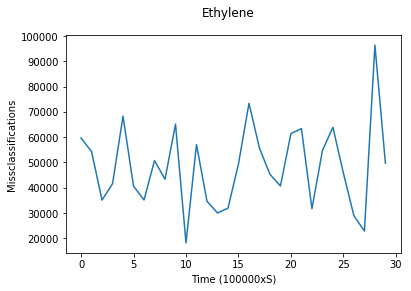

In [45]:
nn = []
y_train = yE[:500000]
lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(x_train, y_train.values.reshape(-1,1))
for index,val in enumerate(l):
    LDA_test_pred = lda.predict(val)
    tn, fp, fn, tp = confusion_matrix(m[index], LDA_test_pred).ravel()
    nn.append(fn + fp) 
plt.figure()
plt.plot(nn)
plt.suptitle('Ethylene')
plt.xlabel('Time (100000xS)')
plt.ylabel('Missclassifications')

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'Missclassifications')

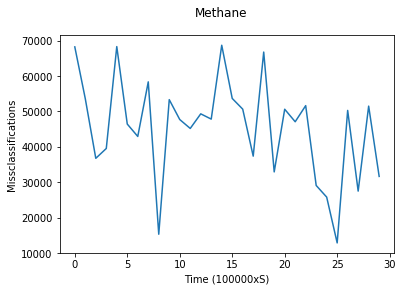

In [47]:
o = []
y_train = yM[:500000]
lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(x_train, y_train.values.reshape(-1,1))
for index,val in enumerate(l):
    LDA_test_pred = lda.predict(val)
    tn, fp, fn, tp = confusion_matrix(n[index], LDA_test_pred).ravel()
    o.append(fn + fp)
plt.figure()
plt.plot(o)
plt.suptitle('Methane')
plt.xlabel('Time (100000xS)')
plt.ylabel('Missclassifications')

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'Missclassifications')

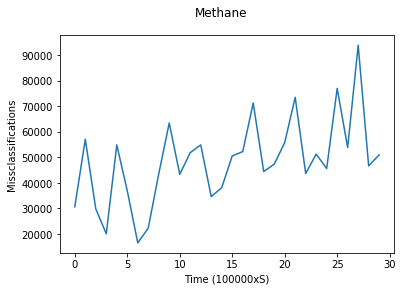

In [50]:
#analysing drift of one sensor
x = df3['3'].values.reshape(-1,1)
x_train = x[:500000]
l = [x[500000:600000],x[600000:700000],x[700000:800000],x[800000:900000],x[1000000:1100000],x[1100000:1200000],x[1200000:1300000],x[1300000:1400000],x[1400000:1500000],x[1600000:1700000],x[1800000:1900000],x[2000000:2100000],x[2100000:2200000],x[2200000:2300000],x[2300000:2400000],x[2400000:2500000],x[2500000:2600000],x[2600000:2700000],x[2700000:2800000],x[2800000:2900000],x[2900000:3000000],x[3000000:3100000],x[3100000:3200000],x[3200000:3300000],x[3300000:3400000],x[3400000:3500000],x[3500000:3600000],x[3600000:3700000],x[3700000:3800000],x[3800000:3900000]]

r = []
y_train = yM[:500000]
lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(x_train, y_train.values.reshape(-1,1))
for index,val in enumerate(l):
    LDA_test_pred = lda.predict(val)
    tn, fp, fn, tp = confusion_matrix(n[index], LDA_test_pred).ravel()
    r.append(fn + fp)
plt.figure()
plt.plot(r)
plt.suptitle('Methane')
plt.xlabel('Time (100000xS)')
plt.ylabel('Missclassifications')

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'Missclassifications')

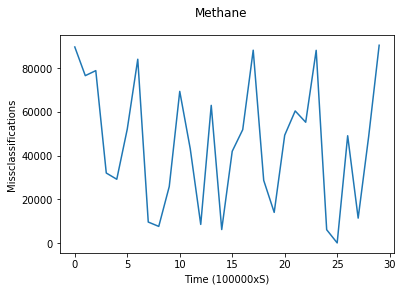

In [23]:
jj = []
y_train = yM[:500000]
lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(x_train, y_train.values.reshape(-1,1))

for index,val in enumerate(l):
    LDA_prob = lda.predict_proba(val)
    cp_arr=[]
    for ind, arr in enumerate(LDA_prob):
        if arr[1] > (0.5 + ind*.00001):
            cp_arr.append(1)
        else:
            cp_arr.append(0)
    tn, fp, fn, tp = confusion_matrix(n[index], cp_arr).ravel()
    jj.append(fn + fp) 
    
    
plt.plot(jj)
plt.suptitle('Methane')
plt.xlabel('Time (100000xS)')
plt.ylabel('Missclassifications')

<br>
<br>
<br>
<br>

## Linear Regression 



In [9]:
x1 = df[['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']].values
ym1 = df['Methane'].values.reshape(-1,1)
ye1 = df['Ethylene'].values.reshape(-1,1)
y1 = np.concatenate((ym1, ye1), axis=1)

x1_train, x1_test, y1_train, y1_test= train_test_split(x1, y1, test_size=0.50, random_state=42)

df2 = df.drop(columns='2')
df3 = df2[20000:]

x2 = df3[['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']].values
ym2 = df3['Methane'].values.reshape(-1,1)
ye2 = df3['Ethylene'].values.reshape(-1,1)
y2 = np.concatenate((ym2, ye2), axis=1)
x2_train, x2_test, ym2_train, ym2_test= train_test_split(x2, ym2, test_size=0.50, random_state=42)


In [10]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score as cvs
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn.linear_model import LinearRegression 
LR = LinearRegression()


p_order = np.arange(1, 4)
kf = KFold(n_splits = 2)
scores = []

#first order
poly=pf(1)
poly_train_eq = poly.fit_transform(x2_train)
score = cvs(LR, poly_train_eq, ym2_train, cv = kf, scoring = 'neg_mean_squared_error').mean()
scores.append(-score)
print(scores)


[1799.7136643636916]


In [33]:
poly_test_eq = poly.fit_transform(x2_test)
LR.fit(poly_train_eq, ym2_train)
LR_pred1 = LR.predict(poly_test_eq)

(2000000, 2000100)

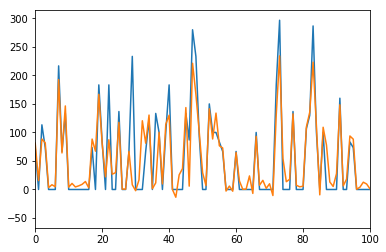

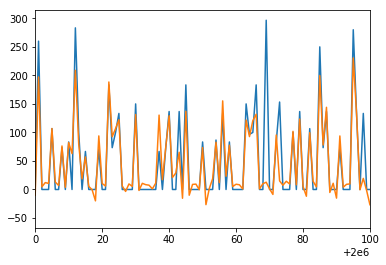

In [34]:
plt.plot(ym2_test)
plt.plot(LR_pred1)
plt.xlim(0, 100)
plt.figure()
plt.plot(ym2_test)
plt.plot(LR_pred1)
plt.xlim(2000000, 2000100)

In [35]:
#second order

poly=pf(2)
poly_train_eq2 = poly.fit_transform(x2_train)
score = cvs(LR, poly_train_eq2, ym2_train, cv = kf, scoring = 'neg_mean_squared_error').mean()
scores.append(-score)
print(scores)

[1799.7136643636916, 1546.9880981978872]


In [36]:
poly_test_eq2 = poly.fit_transform(x2_test)
LR.fit(poly_train_eq2, ym2_train)
LR_pred2 = LR.predict(poly_test_eq2)

(2000000, 2000010)

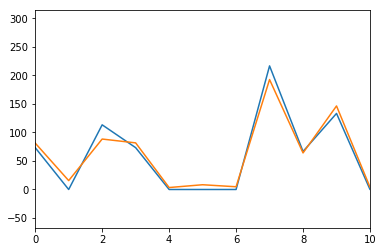

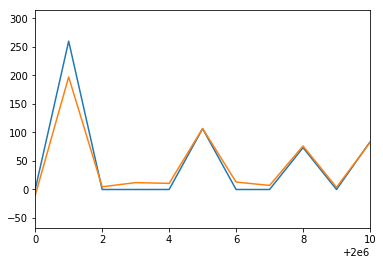

In [37]:
plt.plot(ym2_test)
plt.plot(LR_pred1)
plt.xlim(0, 10)
plt.figure()
plt.plot(ym2_test)
plt.plot(LR_pred1)
plt.xlim(2000000, 2000010)

**Polynomial fit with rolling average**

In [11]:
win = 8
rollm = df3[['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']].rolling(win).mean()
rollm.rename({'1':'1avg','3':'3avg','4':'4avg','5':'5avg','6':'6avg','7':'7avg','8':'8avg','9':'9avg','10':'10avg','11':'11avg','12':'12avg','13':'13avg','14':'14avg','15':'15avg','16':'16avg'}, axis='columns', inplace=True)
df3 = pd.concat([df3,rollm],axis=1)

ex = df3[['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']].ewm(alpha=.3).mean()
ex.rename({'1':'1ex','3':'3ex','4':'4ex','5':'5ex','6':'6ex','7':'7ex','8':'8ex','9':'9ex','10':'10ex','11':'11ex','12':'12ex','13':'13ex','14':'14ex','15':'15ex','16':'16ex'}, axis='columns', inplace=True)
df3 = pd.concat([df3,ex],axis=1)

In [12]:
x4 = df3[['1ex','3ex','4ex','5ex','6ex','7ex','8ex','9ex','10ex','11ex','12ex','13ex','14ex','15ex','16ex']].values
x4=x4[8:]
ym4=ym2[8:]
ye4=ye2[8:]
x4_train, x4_test, ym4_train, ym4_test= train_test_split(x4, ym4, test_size=0.50, random_state=42)

In [44]:
scores = []

#first order
poly=pf(1)
poly_train_eq = poly.fit_transform(x4_train)
score = cvs(LR, poly_train_eq, ym4_train, cv = kf, scoring = 'neg_mean_squared_error').mean()
scores.append(-score)
print(scores)

[1722.3304399872122]


In [14]:
normscores= []
poly=pf(2)
poly_train_eq2 = poly.fit_transform(x4_train)
score = cvs(LR, poly_train_eq2, ym4_train, cv = kf, scoring = 'neg_mean_squared_error').mean()
normscores.append(-score)
print(normscores)

[1454.0377145917487]


In [15]:
poly_test_eq = poly.fit_transform(x4_test)
LR.fit(poly_train_eq2, ym4_train)
LR_pred1 = LR.predict(poly_test_eq)

(2000000, 2000010)

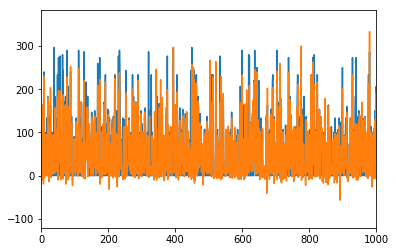

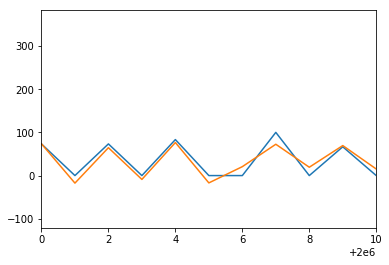

In [31]:
plt.plot(ym4_test)
plt.plot(LR_pred1)
plt.xlim(0, 1000)
plt.figure()
plt.plot(ym4_test)
plt.plot(LR_pred1)
plt.xlim(2000000, 2000010)

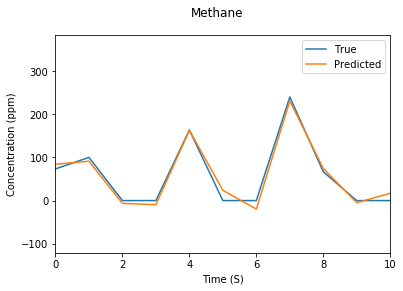

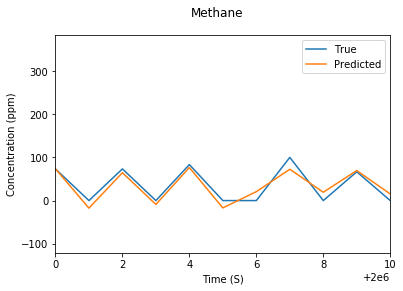

In [19]:
plt.plot(ym4_test, label="True")
plt.plot(LR_pred1, label = "Predicted")
plt.xlim(0, 10)
plt.suptitle('Methane')
plt.xlabel('Time (S)')
plt.ylabel('Concentration (ppm)')
plt.legend(loc='upper right')
plt.figure()



plt.plot(ym4_test, label = "True")
plt.plot(LR_pred1, label = "Predicted")
plt.xlim(2000000, 2000010)
plt.suptitle('Methane')
plt.xlabel('Time (S)')
plt.ylabel('Concentration (ppm)')
plt.legend(loc='upper right')

In [1]:
import sys
sys.path

['C:\\Users\\Ray\\Desktop\\Ray_macbook\\EE257\\RDomingos_BPerez',
 'C:\\Users\\Ray\\anaconda3\\python39.zip',
 'C:\\Users\\Ray\\anaconda3\\DLLs',
 'C:\\Users\\Ray\\anaconda3\\lib',
 'C:\\Users\\Ray\\anaconda3',
 '',
 'C:\\Users\\Ray\\anaconda3\\lib\\site-packages',
 'C:\\Users\\Ray\\anaconda3\\lib\\site-packages\\locket-0.2.1-py3.9.egg',
 'C:\\Users\\Ray\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\Ray\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Ray\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Ray\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Ray\\.ipython']